Step 0


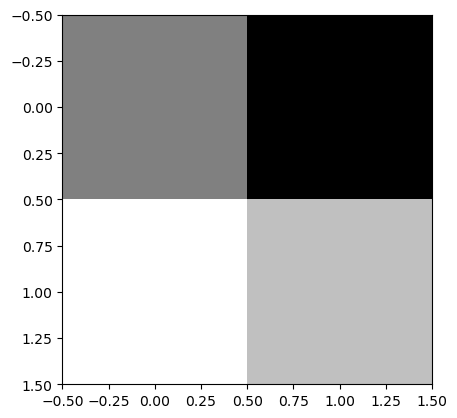

Step 10


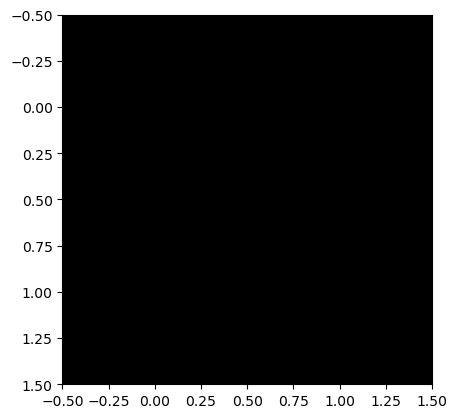

Step 20


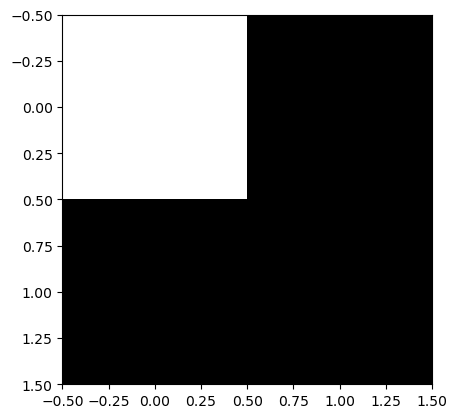

Step 30


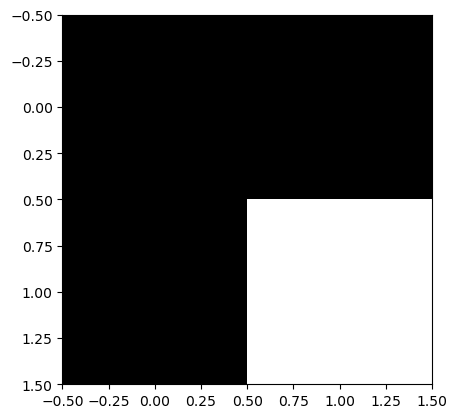

Step 40


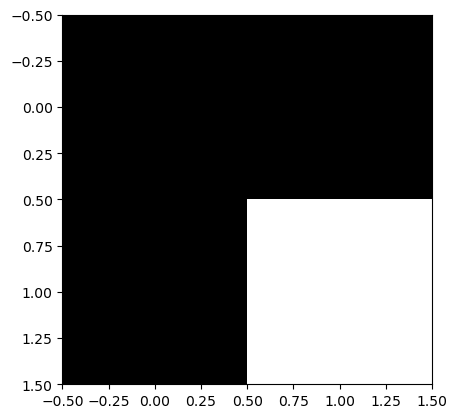

Step 50


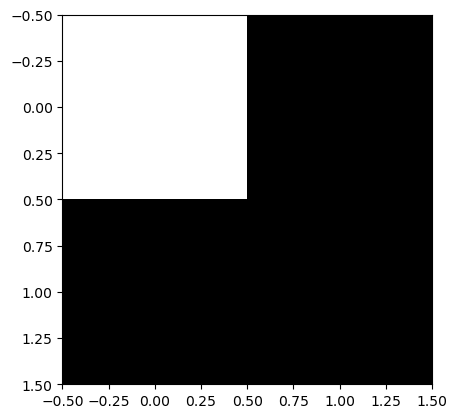

Step 60


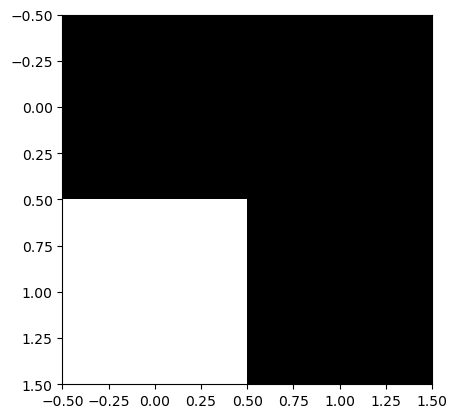

Step 70


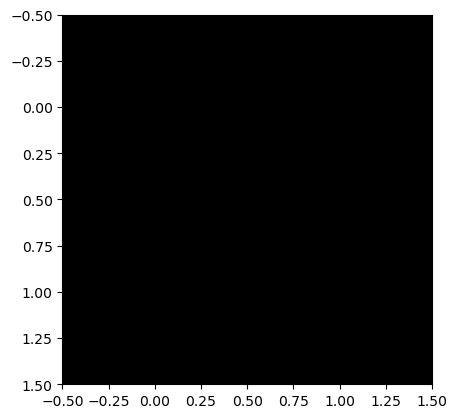

Step 80


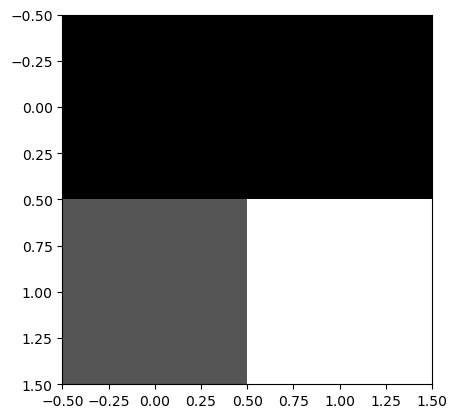

Step 90


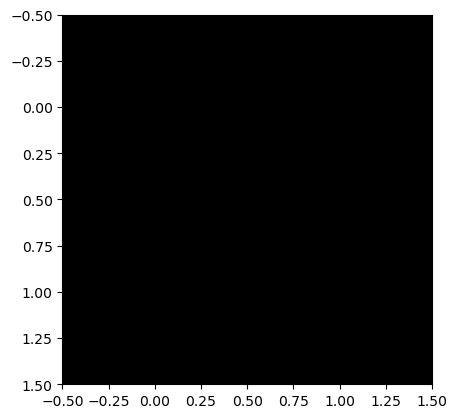

Step 100


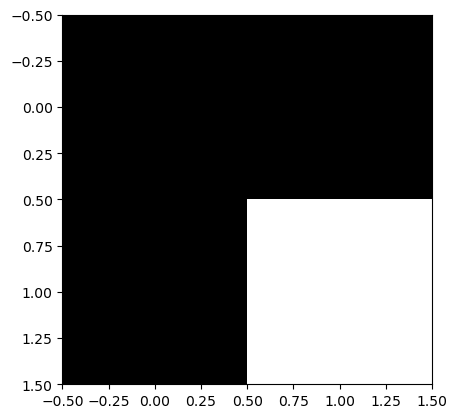

Step 110


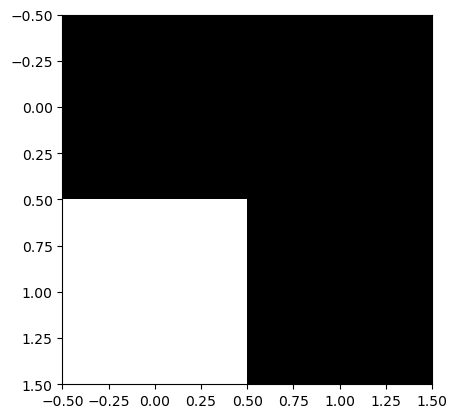

Step 120


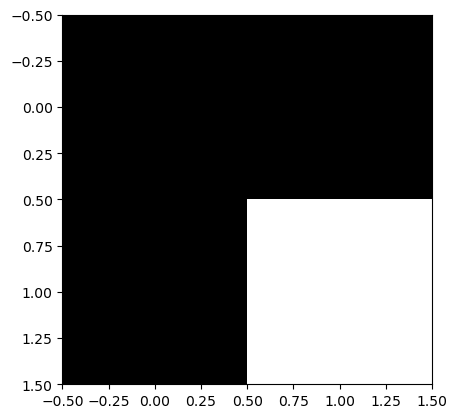

Step 130


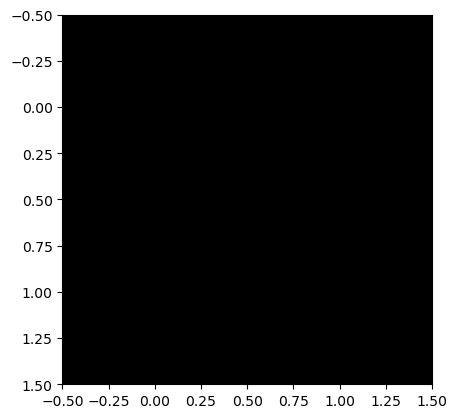

Step 140


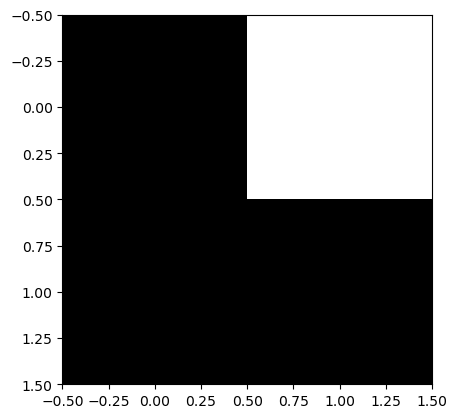

Step 150


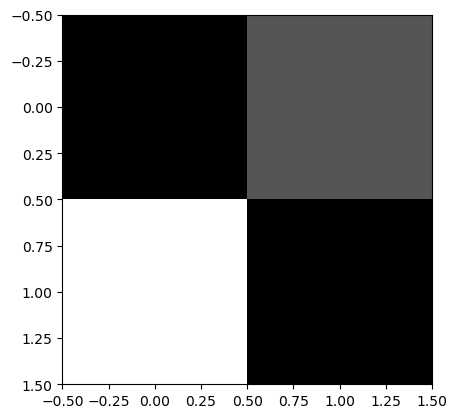

Step 160


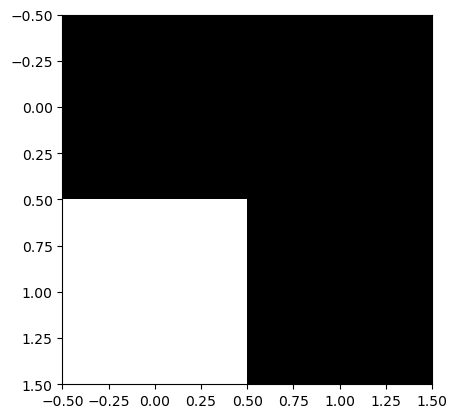

Step 170


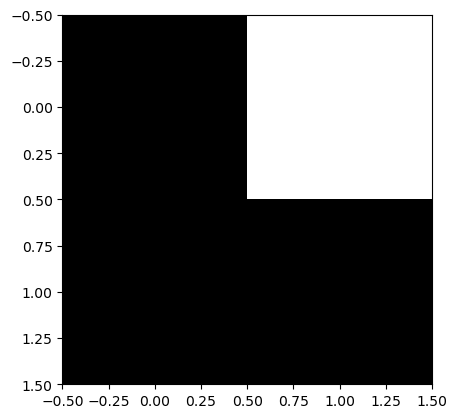

Step 180


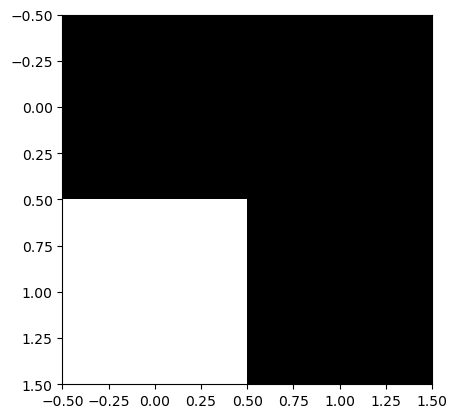

Step 190


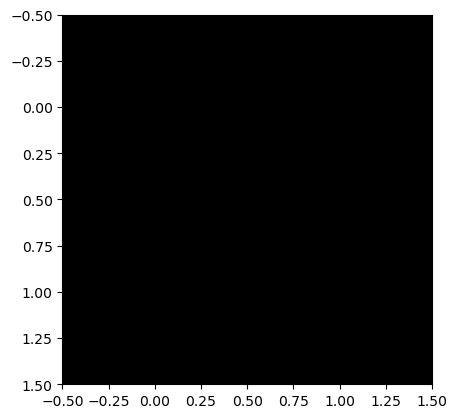

Step 200


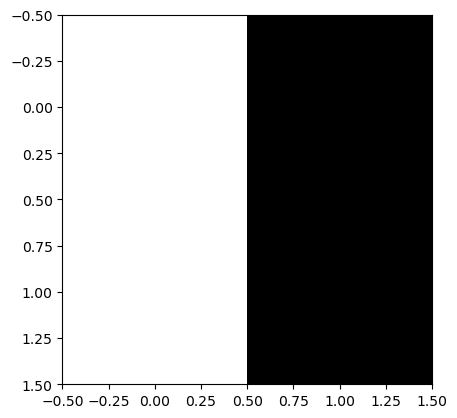

Step 210


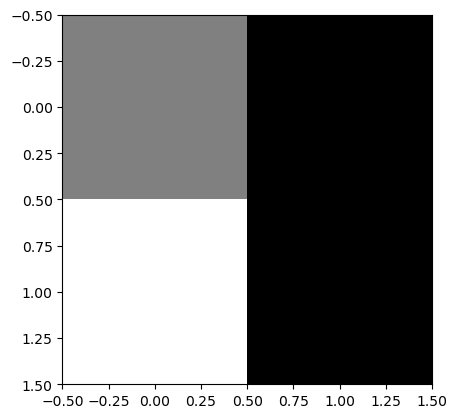

Step 220


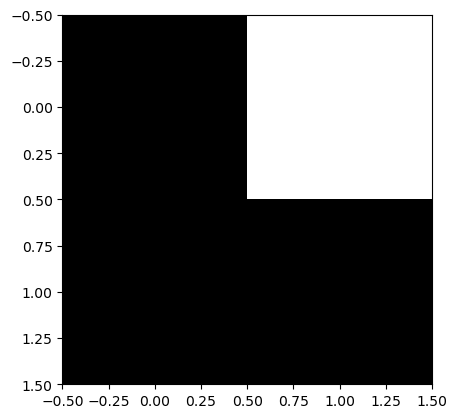

Step 230


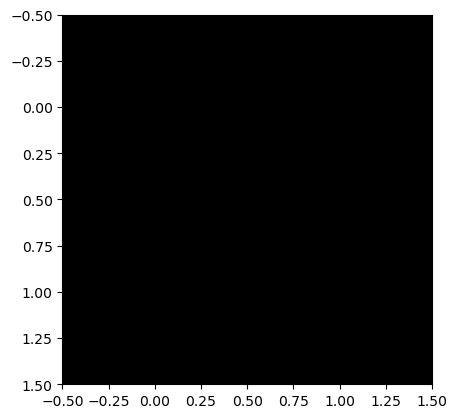

Step 240


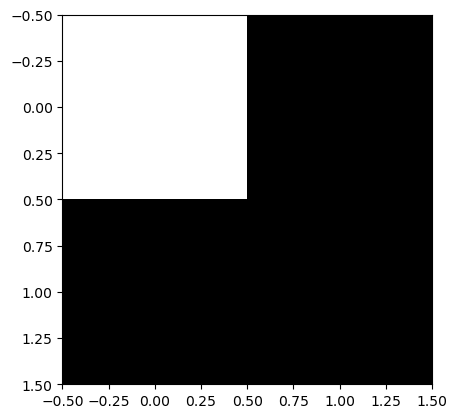

Step 250


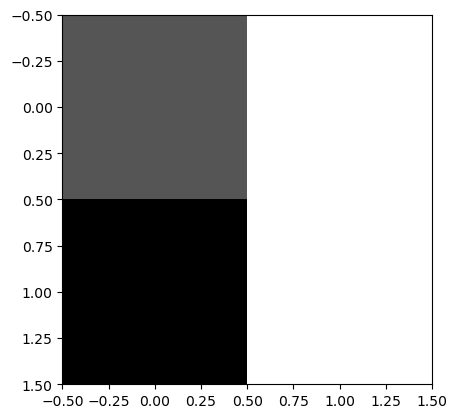

Step 260


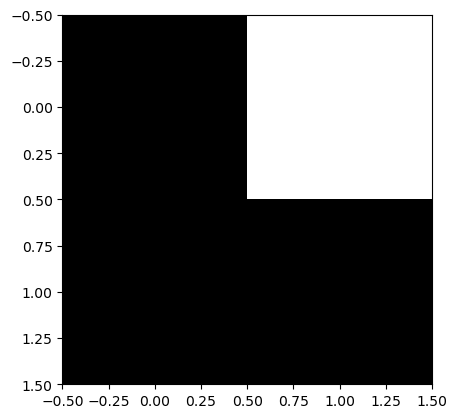

Step 270


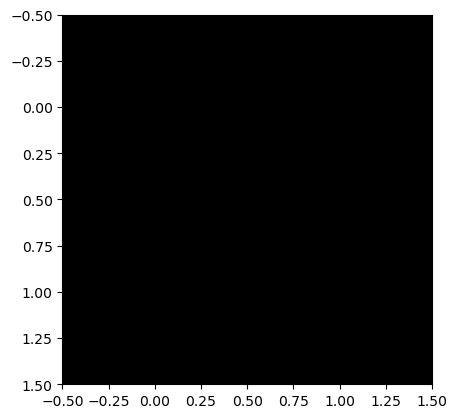

Step 280


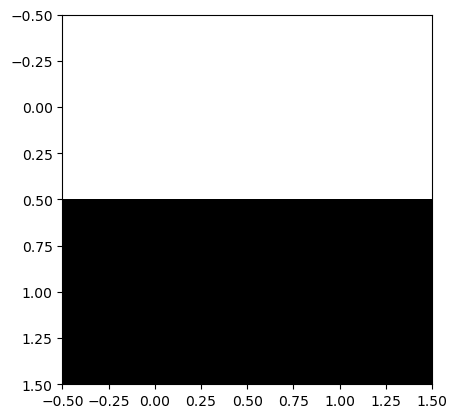

Step 290


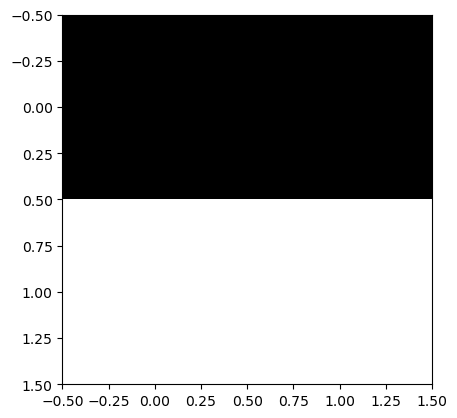

Step 300


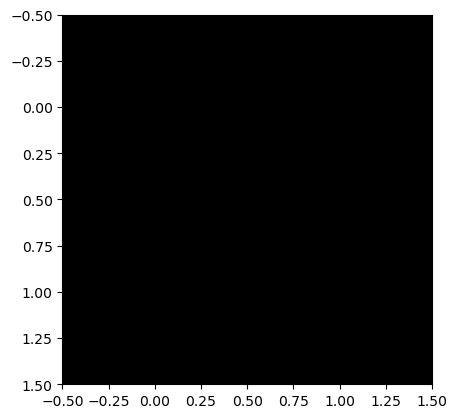

Step 310


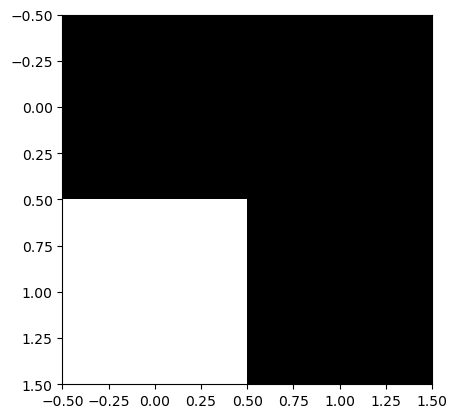

Step 320


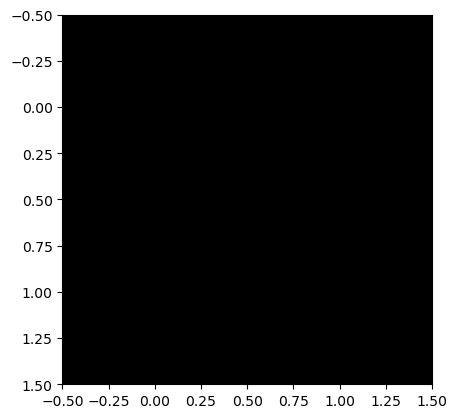

Step 330


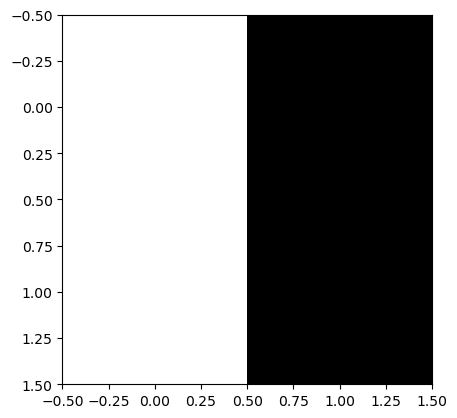

Step 340


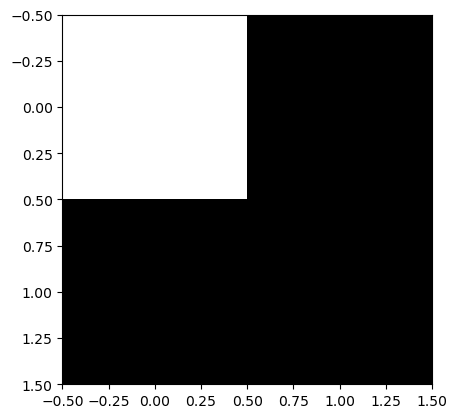

Step 350


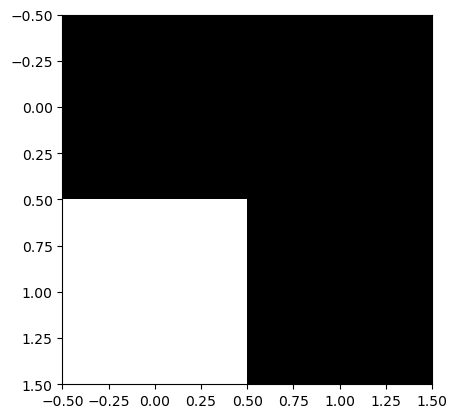

Step 360


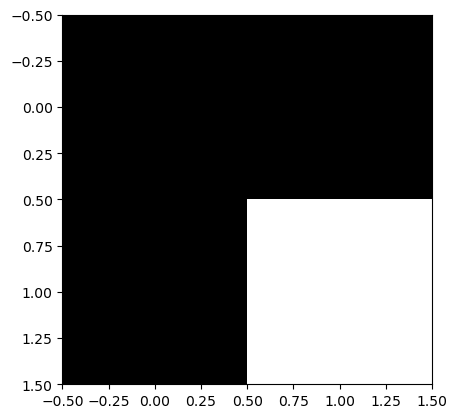

Step 370


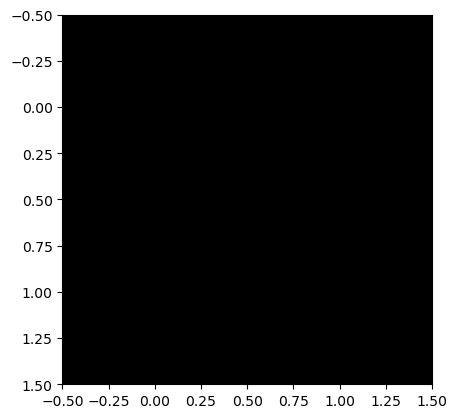

Step 380


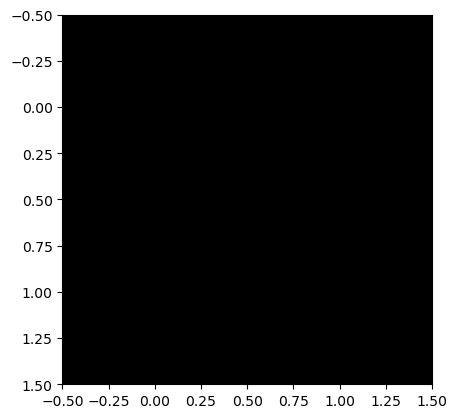

Step 390


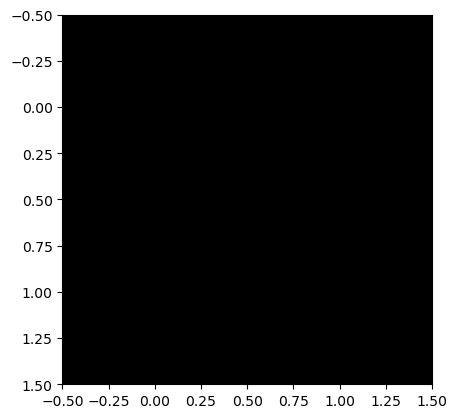

Step 400


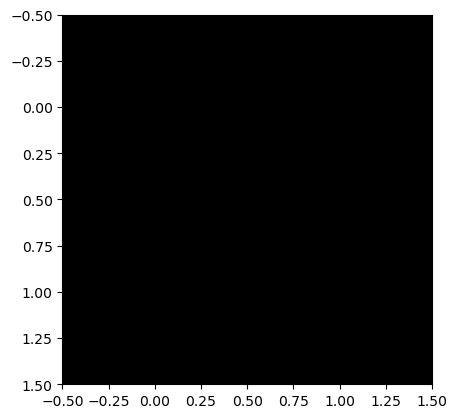

Step 410


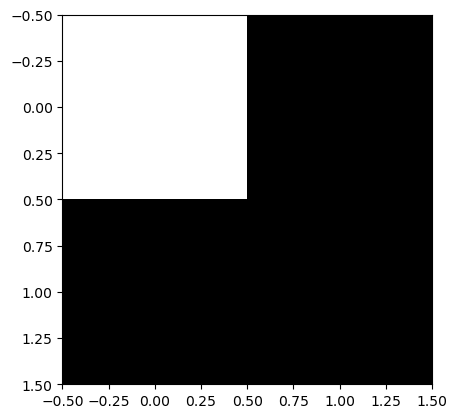

Step 420


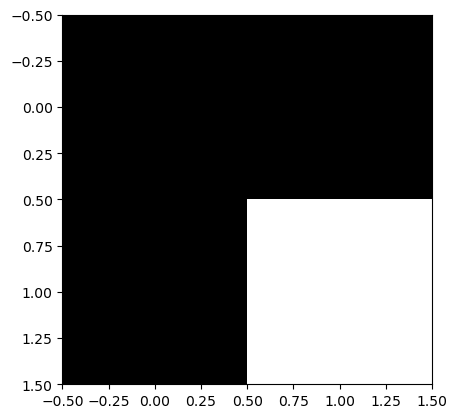

Step 430


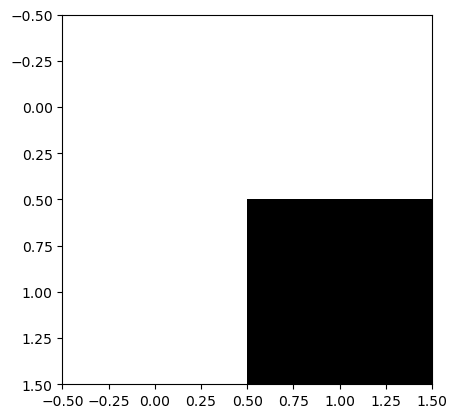

Step 440


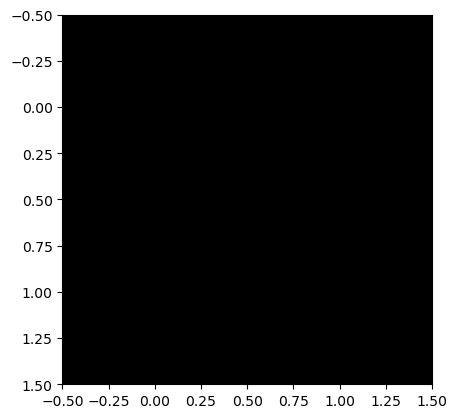

Step 450


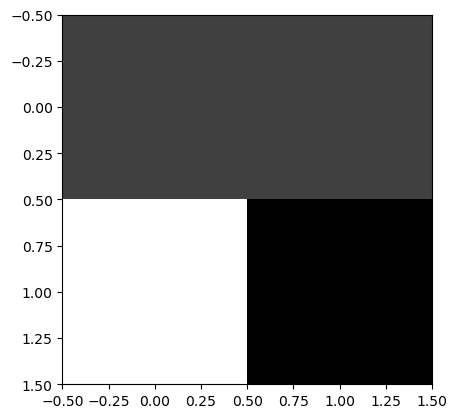

Step 460


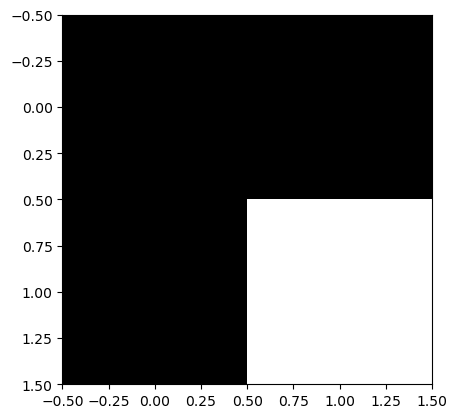

Step 470


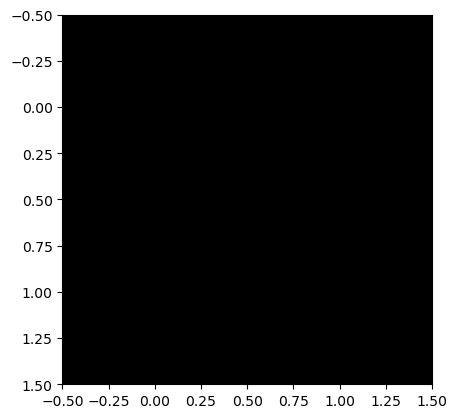

Step 480


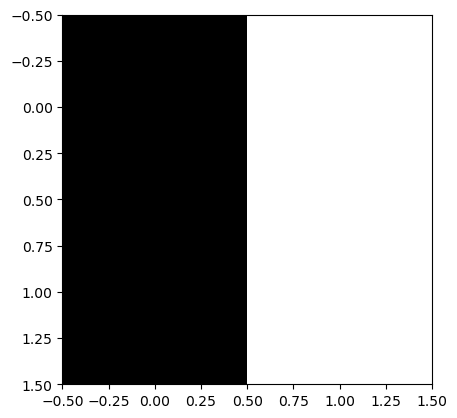

Step 490


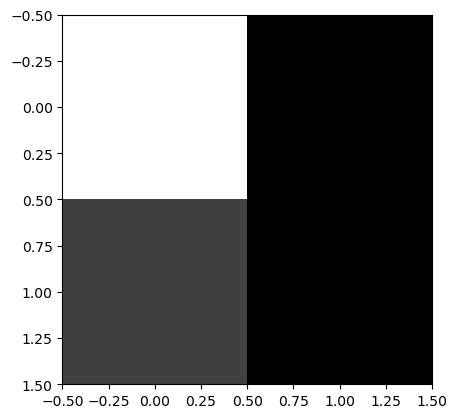

Step 500


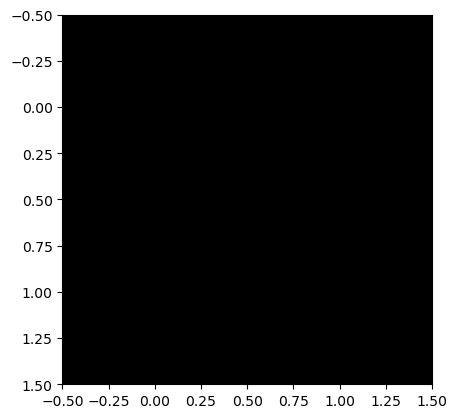

Step 510


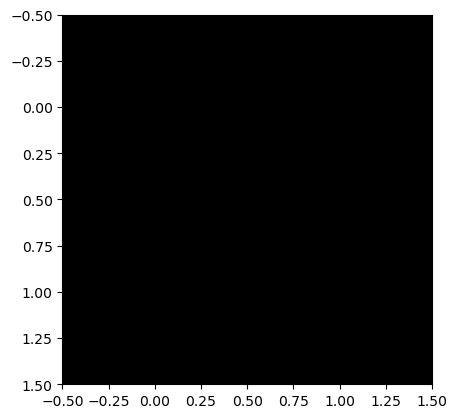

Step 520


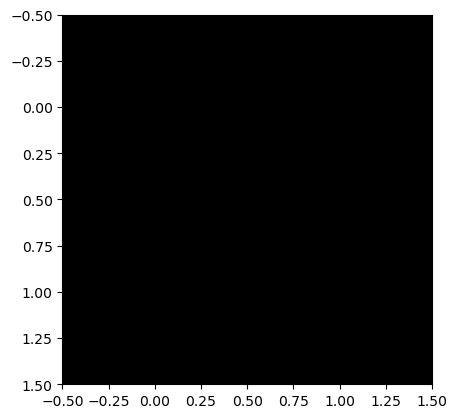

Step 530


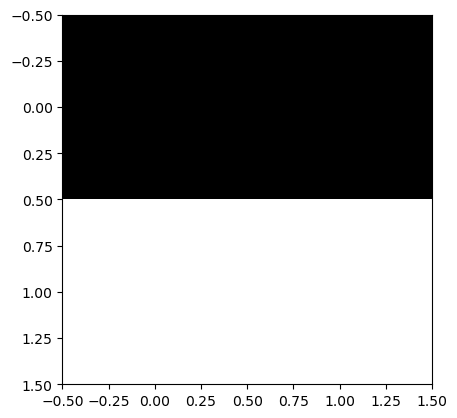

Step 540


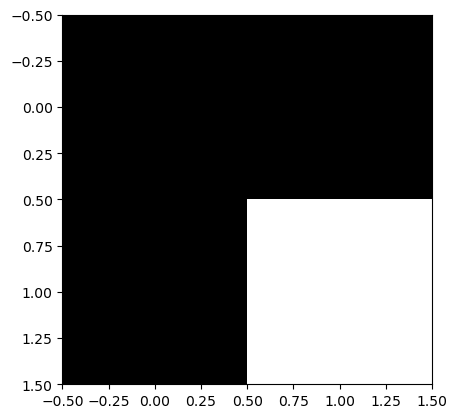

Step 550


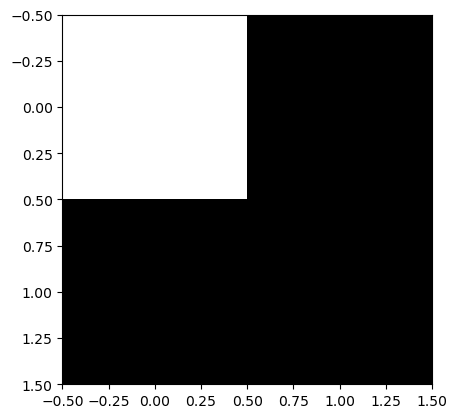

Step 560


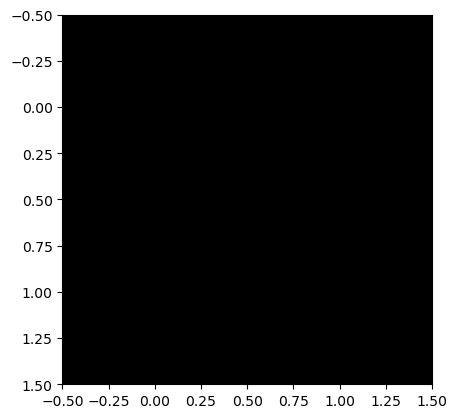

Step 570


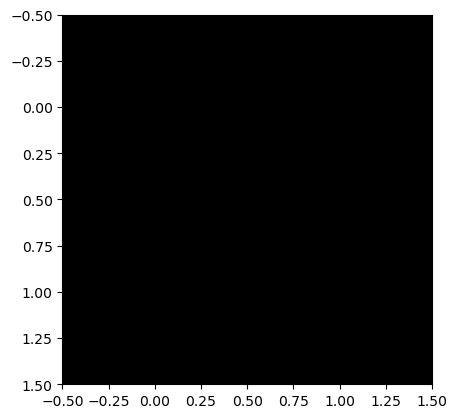

Step 580


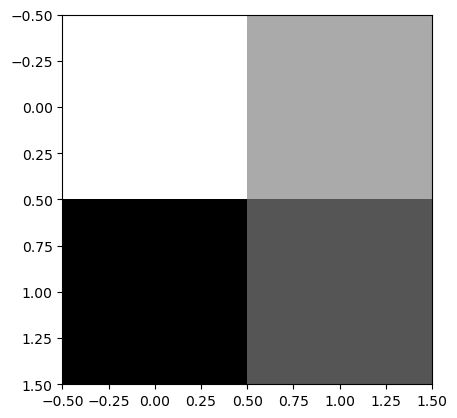

Step 590


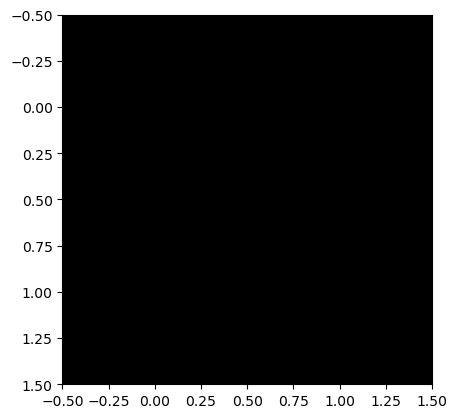

Step 600


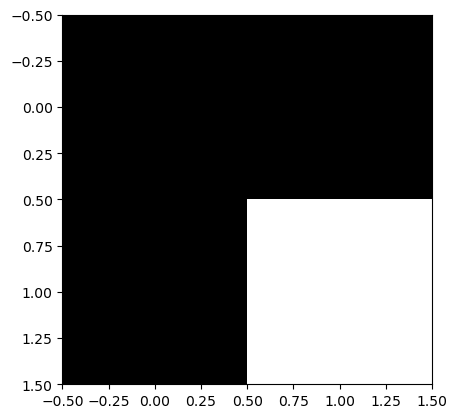

Step 610


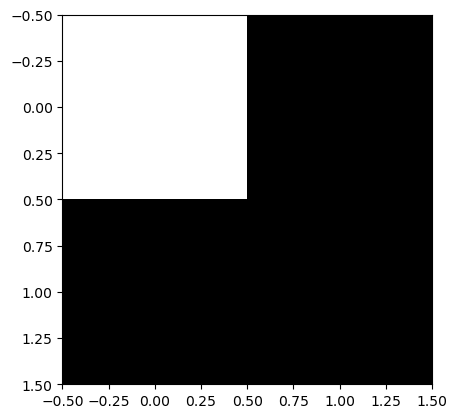

Step 620


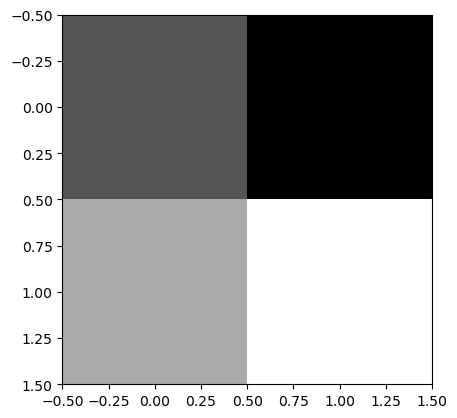

Step 630


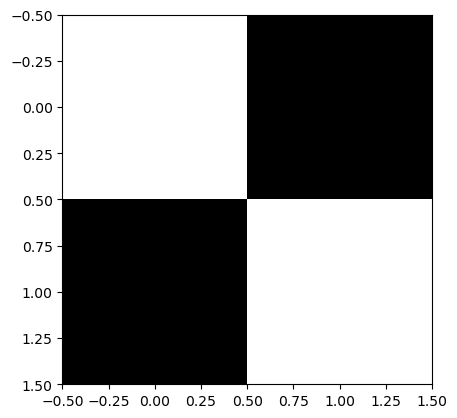

Step 640


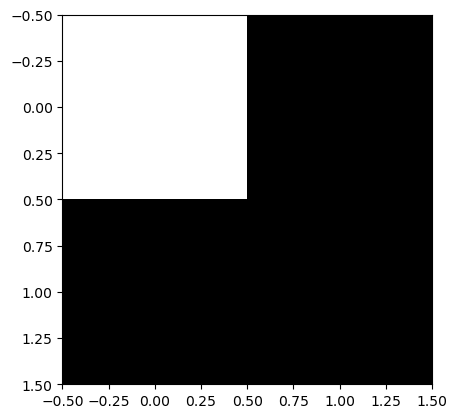

Step 650


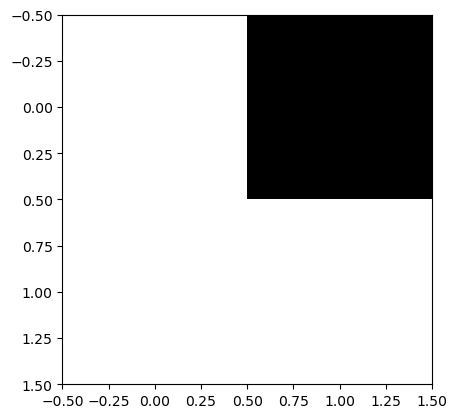

Step 660


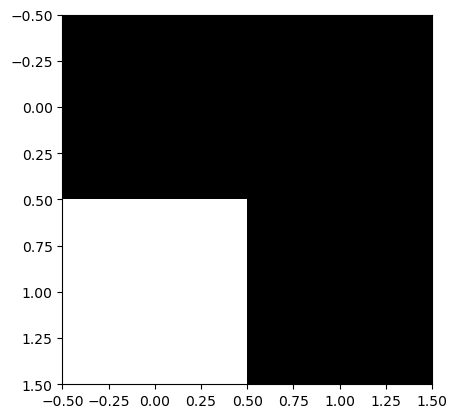

Step 670


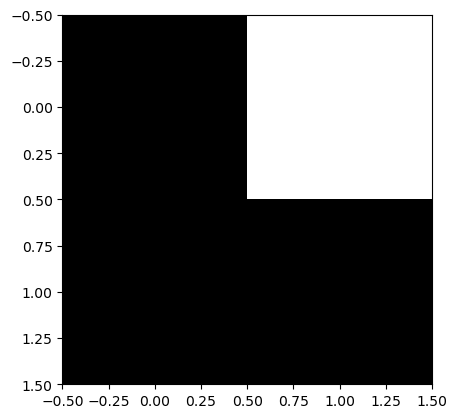

Step 680


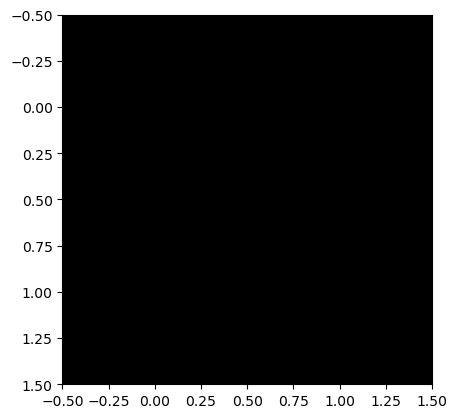

Step 690


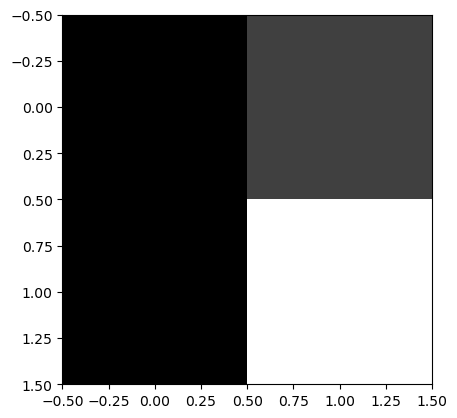

Step 700


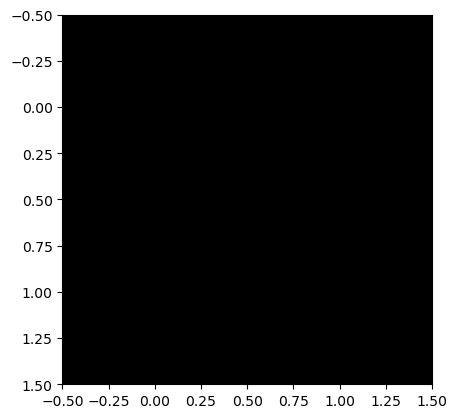

Step 710


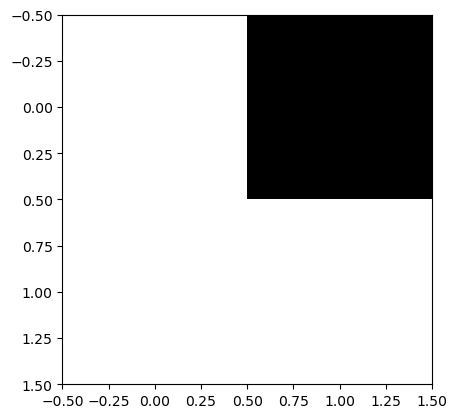

Step 720


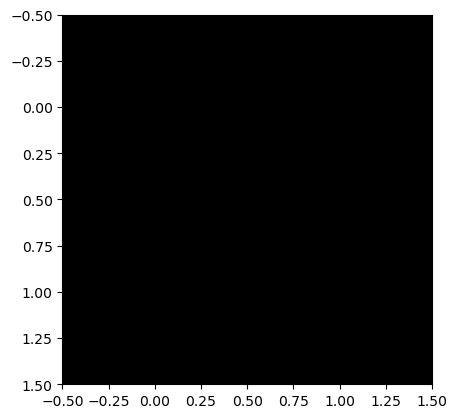

Step 730


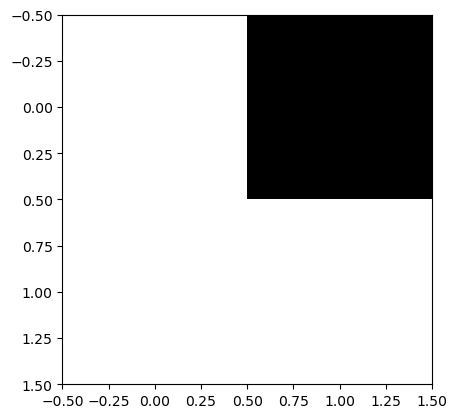

Step 740


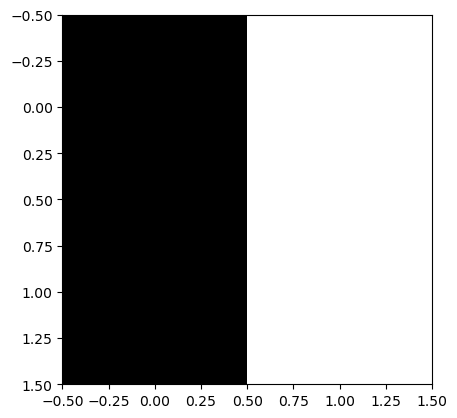

Step 750


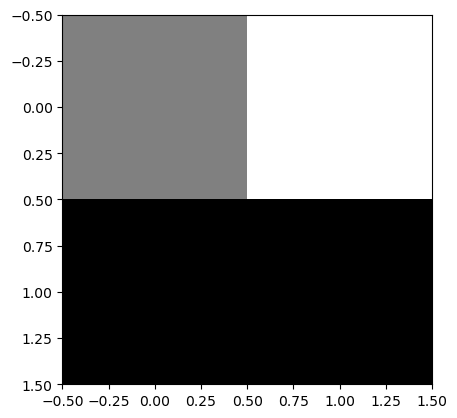

Step 760


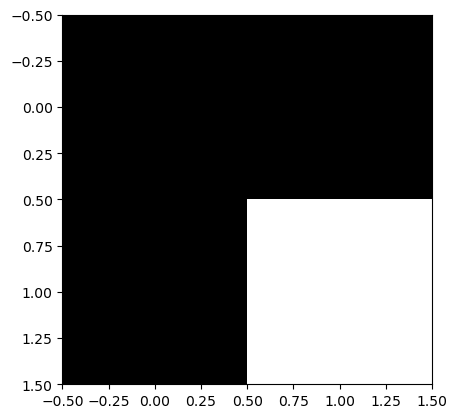

Step 770


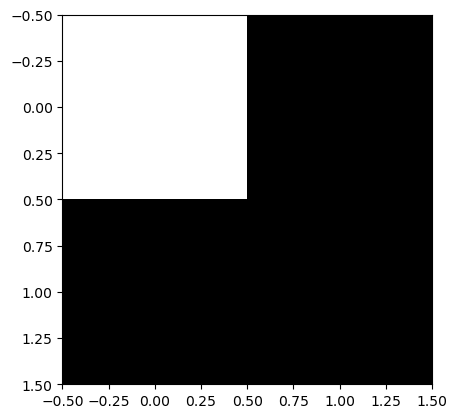

Step 780


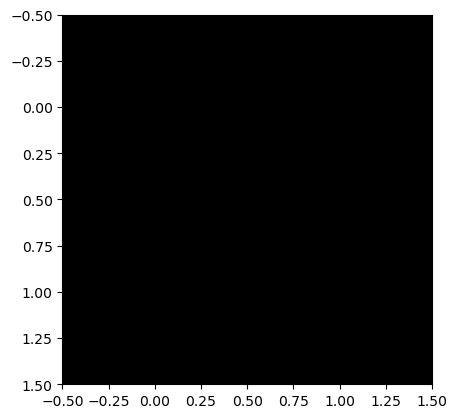

Step 790


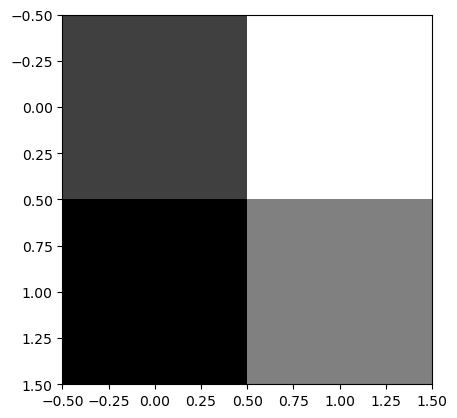

Step 800


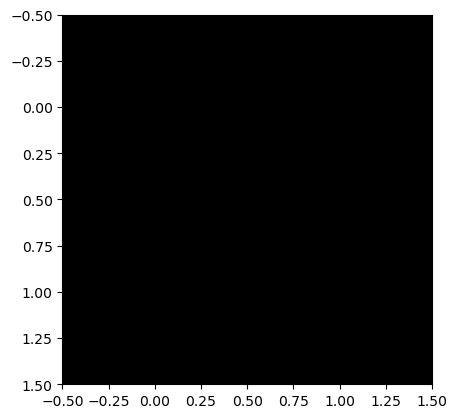

Step 810


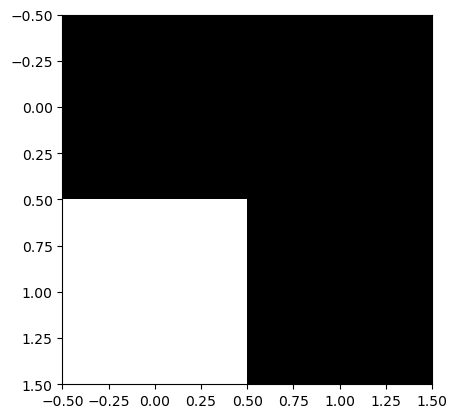

Step 820


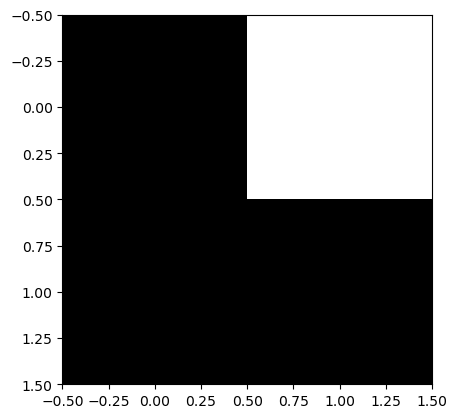

Step 830


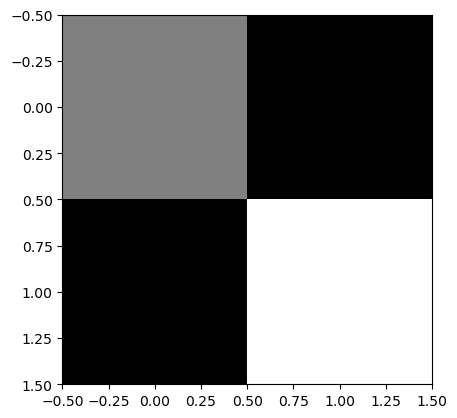

Step 840


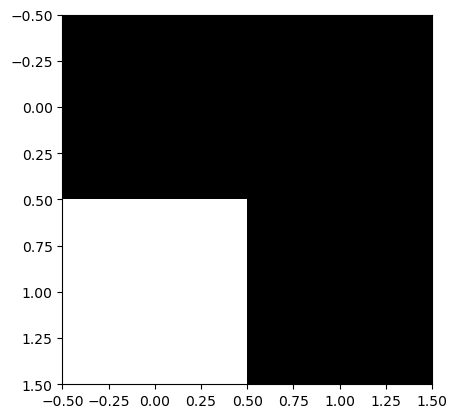

Step 850


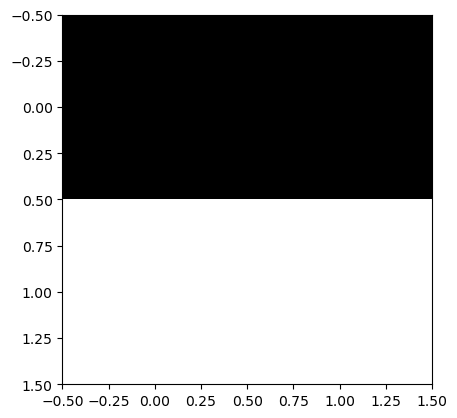

Step 860


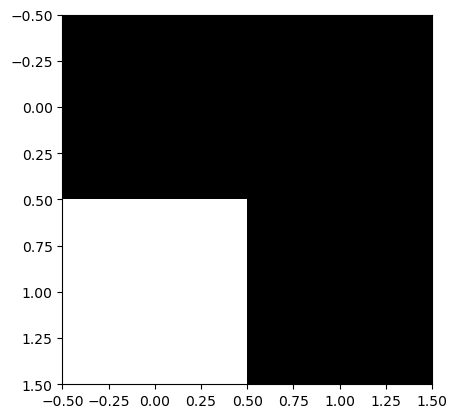

Step 870


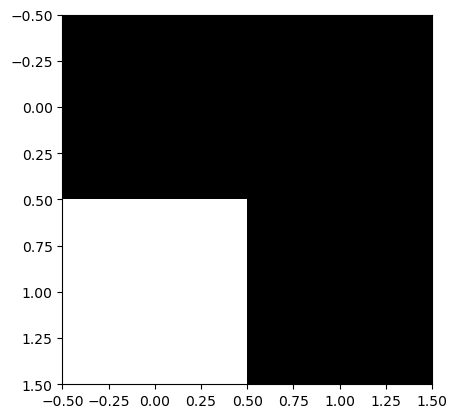

Step 880


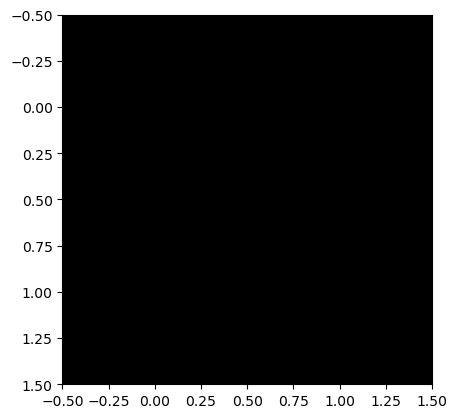

Step 890


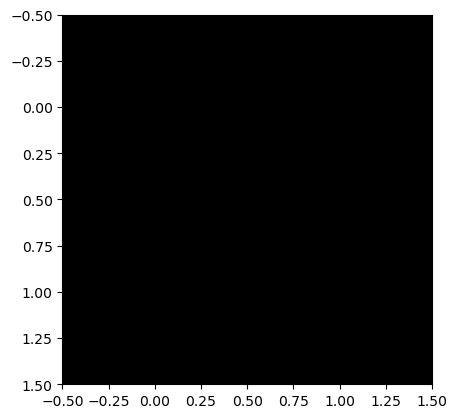

Step 900


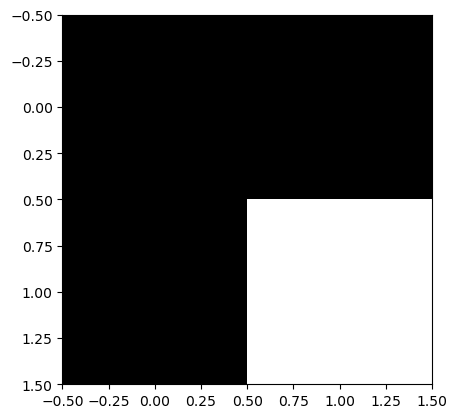

Step 910


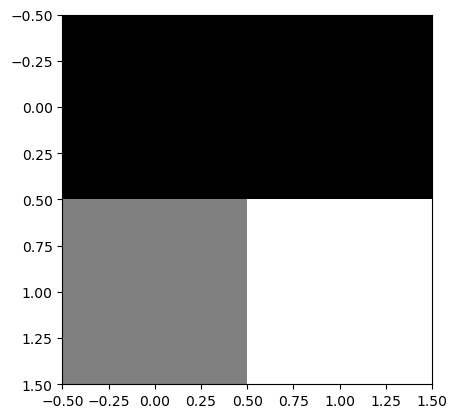

Step 920


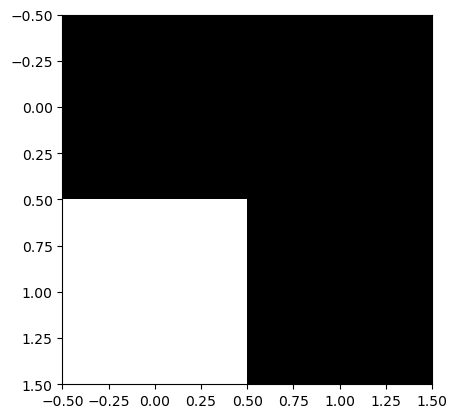

Step 930


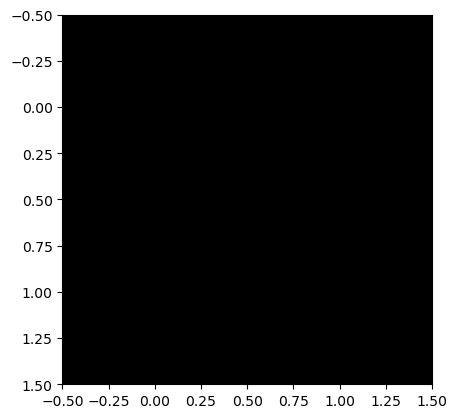

Step 940


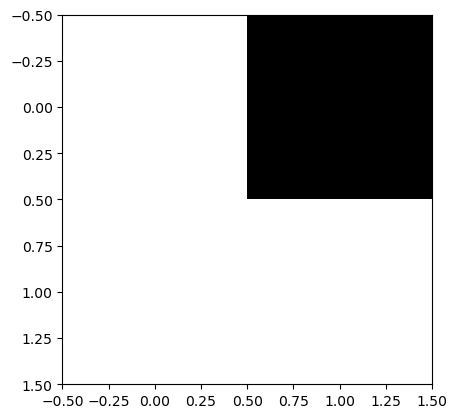

Step 950


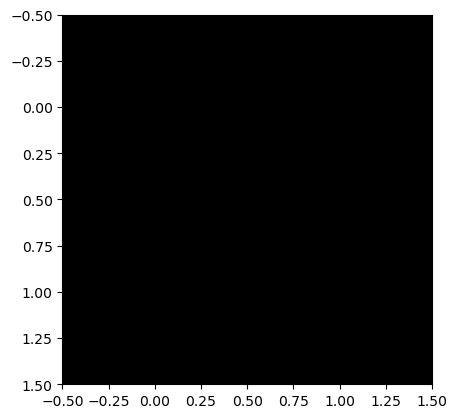

Step 960


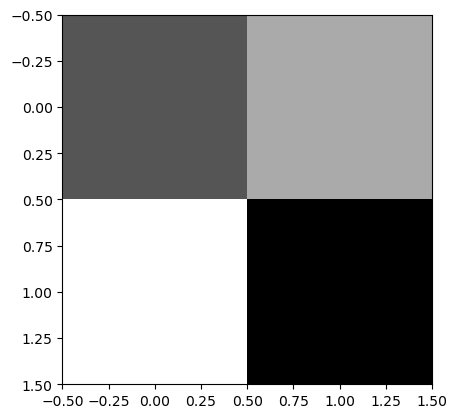

Step 970


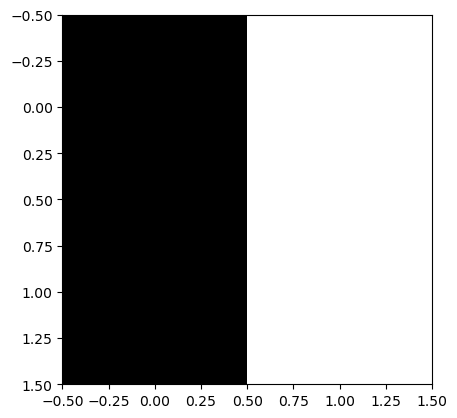

Step 980


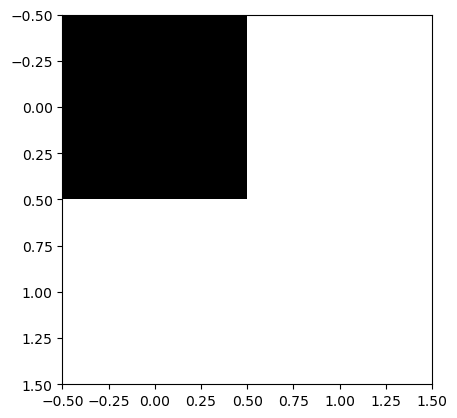

Step 990


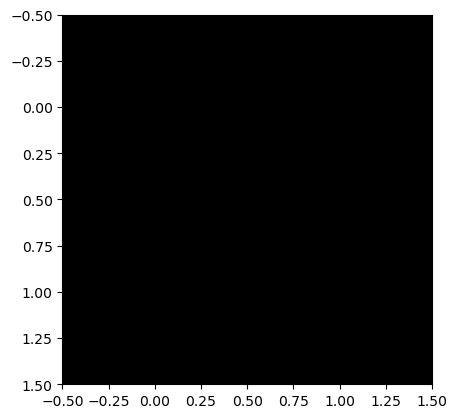

Step 1000


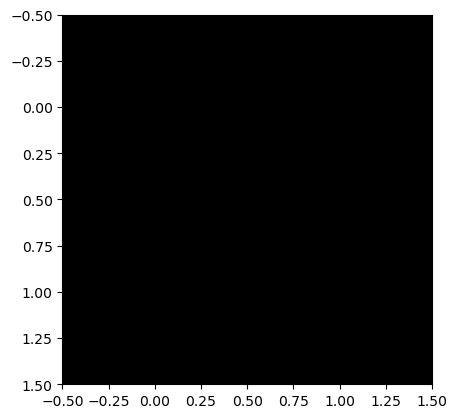

Step 1010


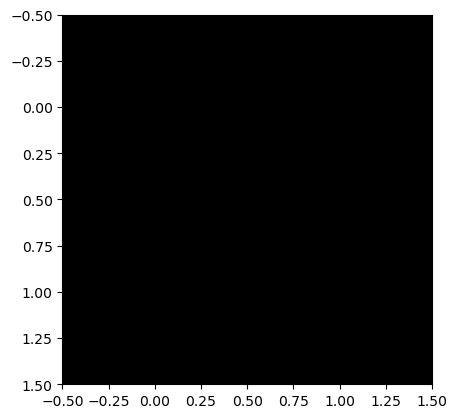

Step 1020


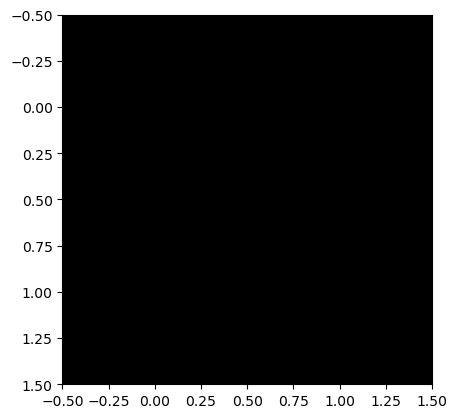

Step 1030


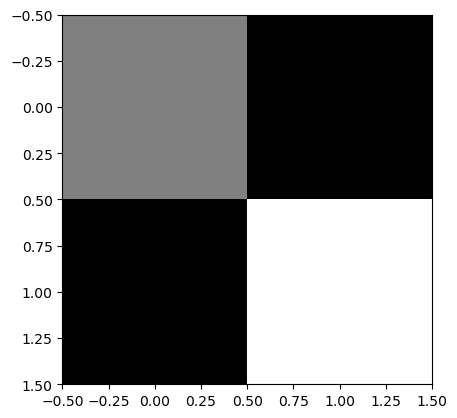

Step 1040


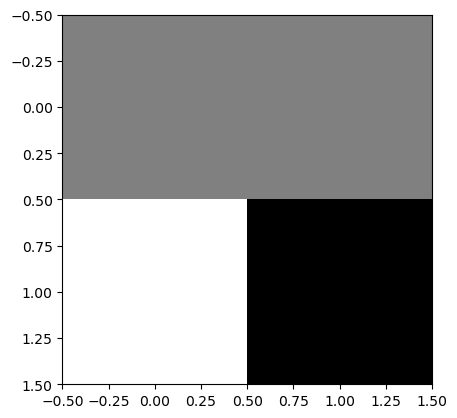

Step 1050


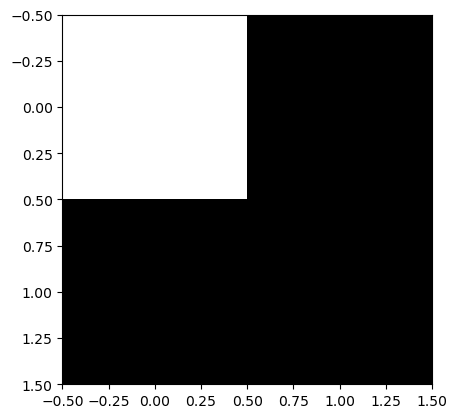

Step 1060


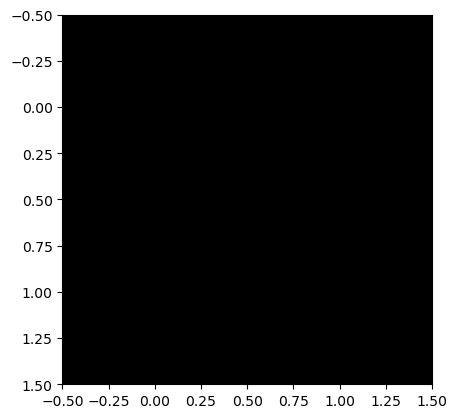

Step 1070


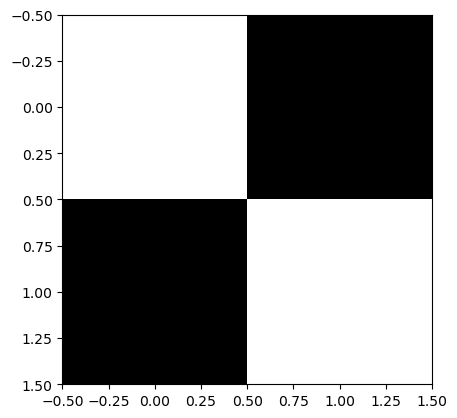

Step 1080


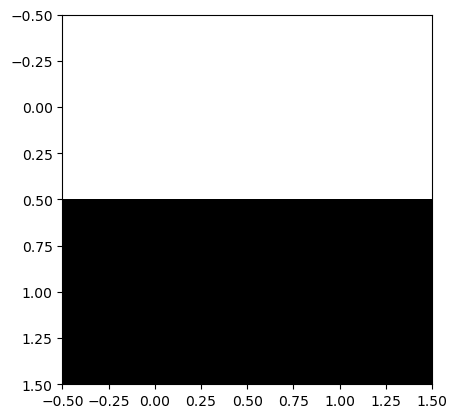

Step 1090


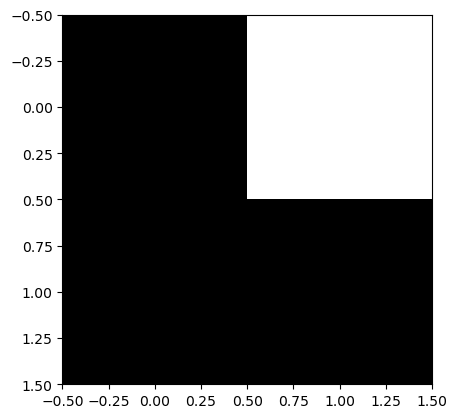

Step 1100


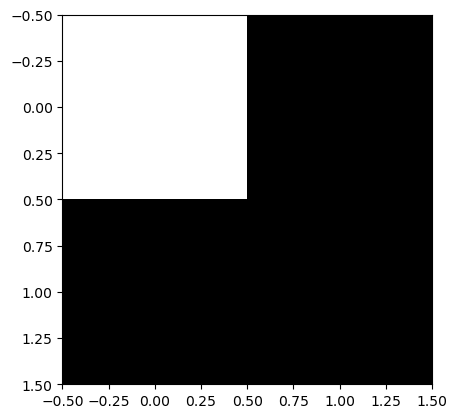

Step 1110


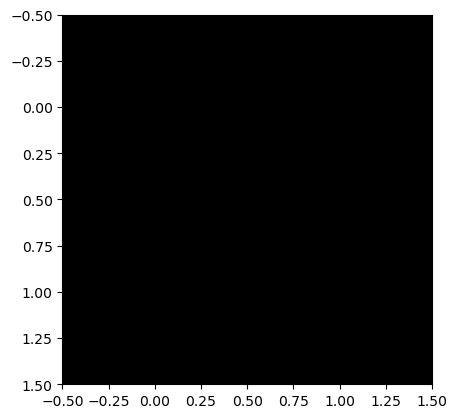

Step 1120


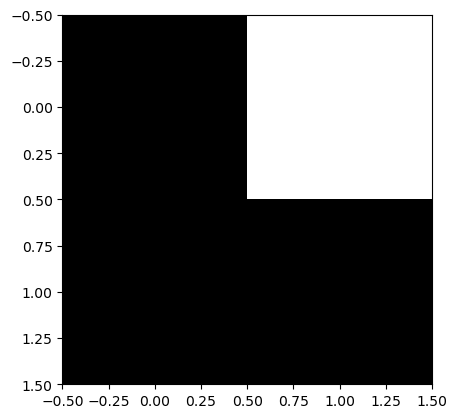

Step 1130


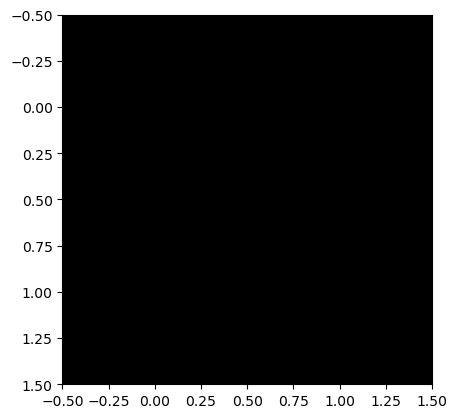

Step 1140


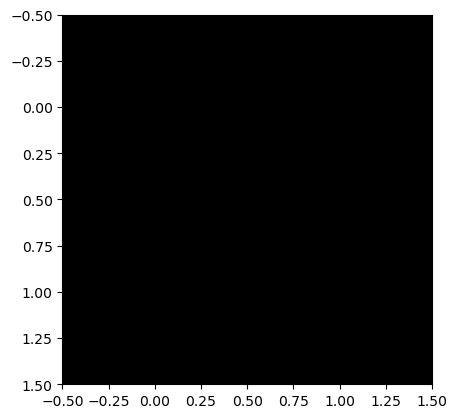

Step 1150


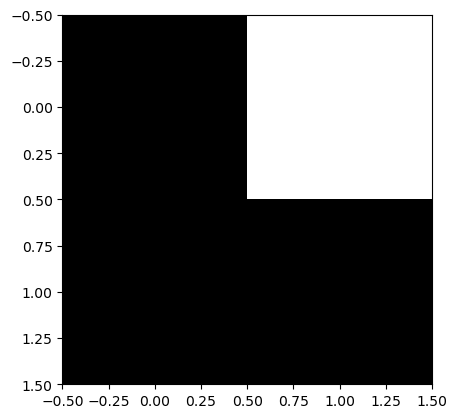

Step 1160


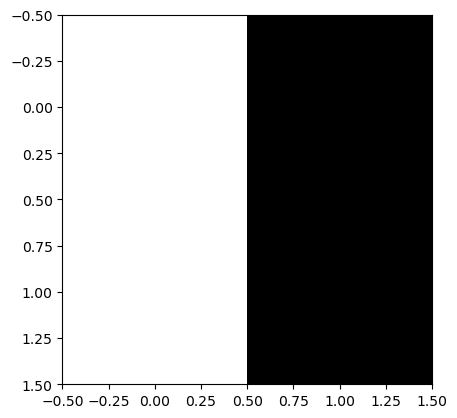

Step 1170


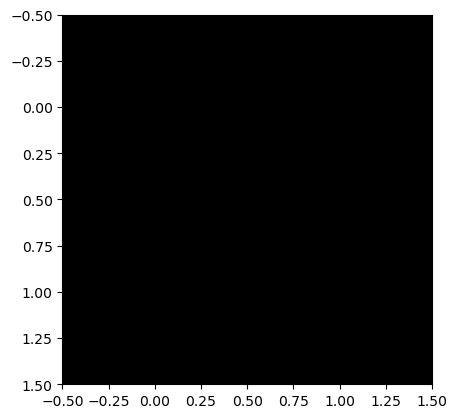

Step 1180


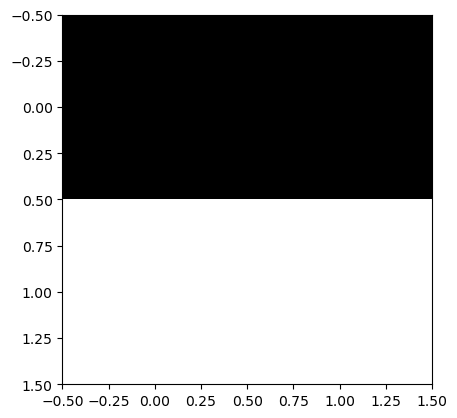

Step 1190


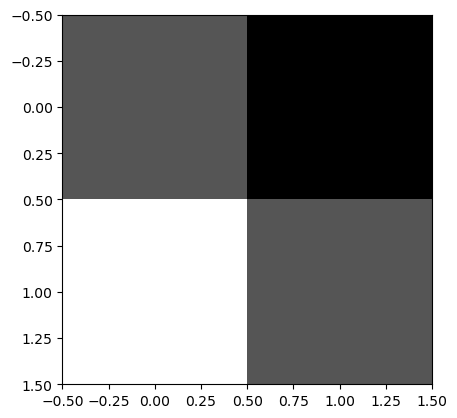

Step 1200


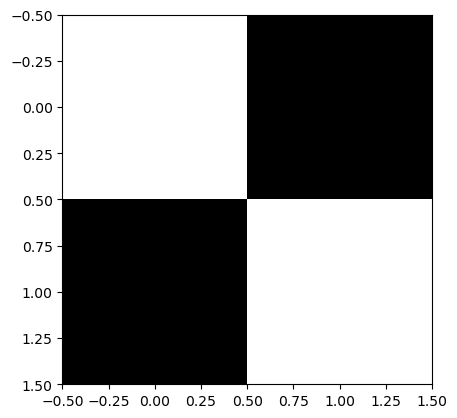

Step 1210


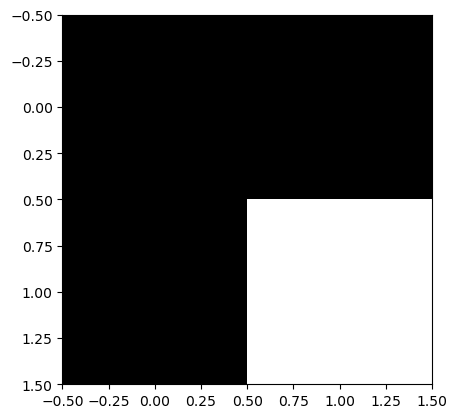

Step 1220


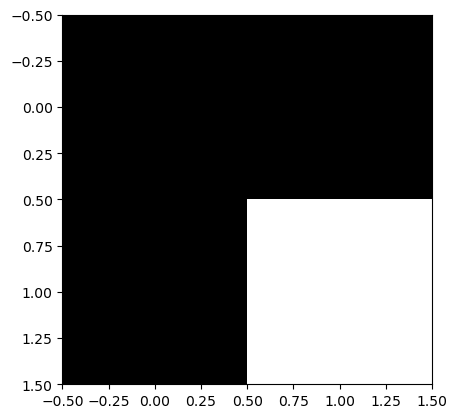

Step 1230


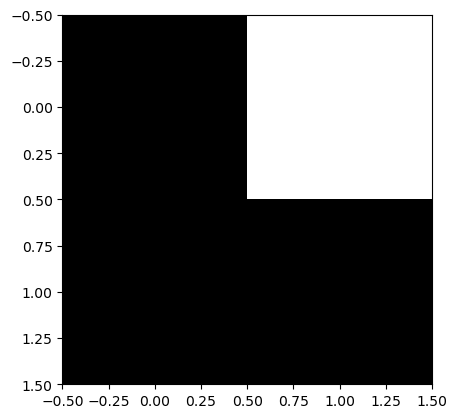

Step 1240


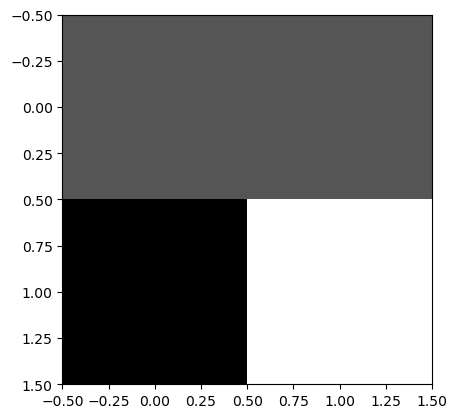

Step 1250


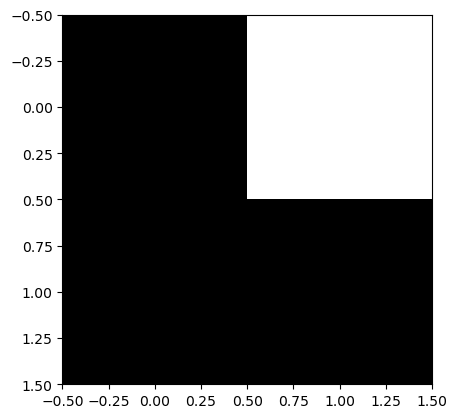

Step 1260


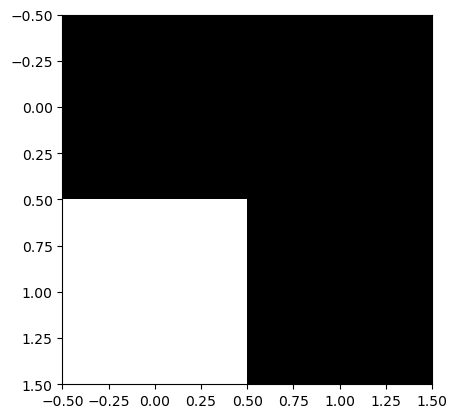

Step 1270


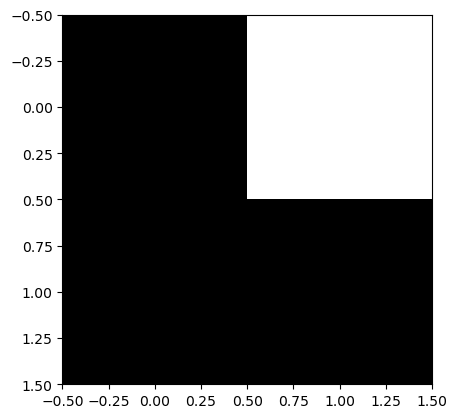

Step 1280


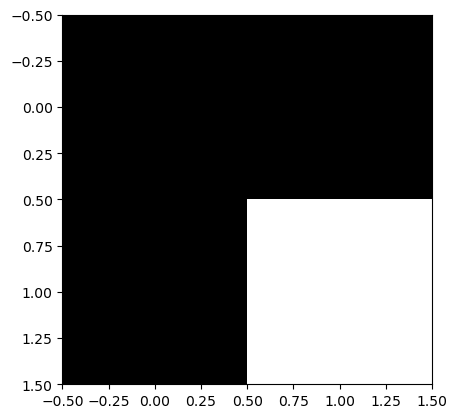

Step 1290


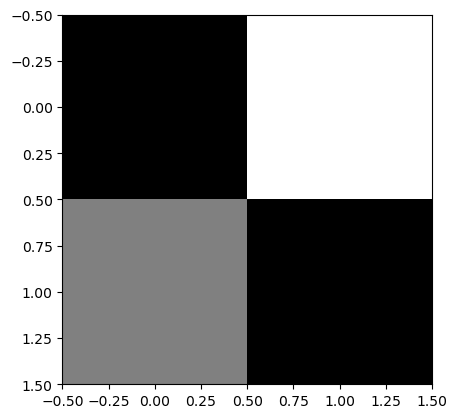

Step 1300


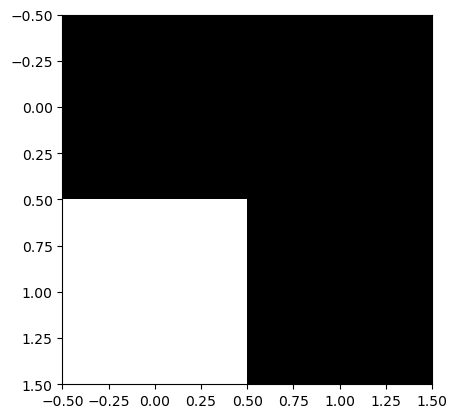

Step 1310


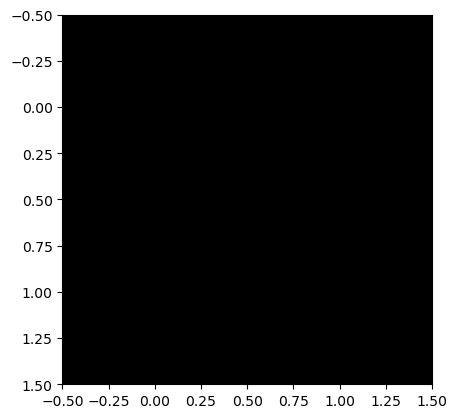

Step 1320


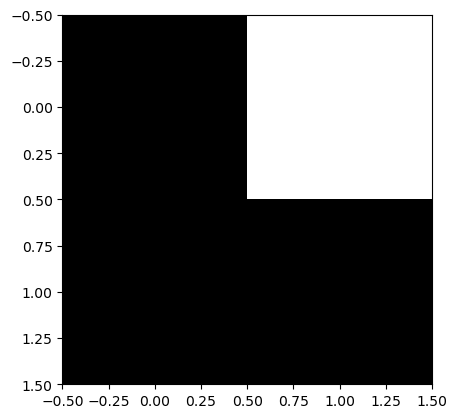

Step 1330


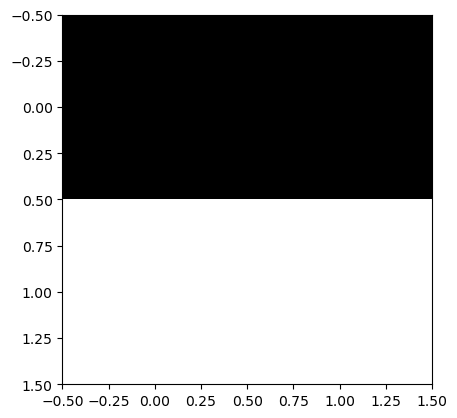

Step 1340


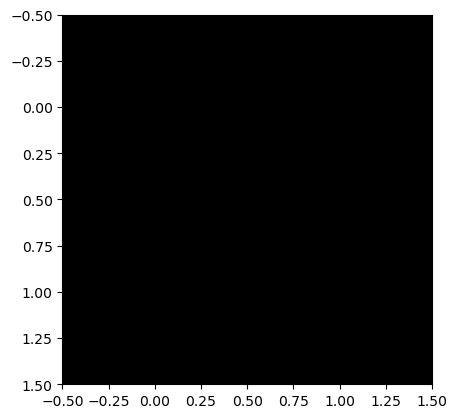

Step 1350


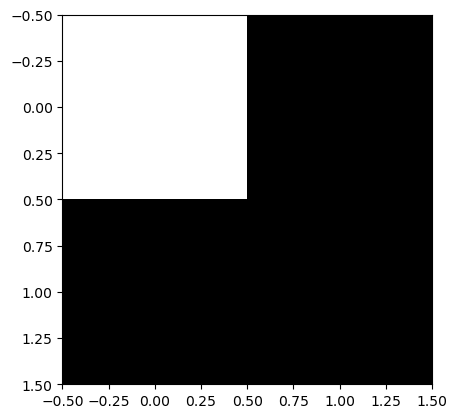

Step 1360


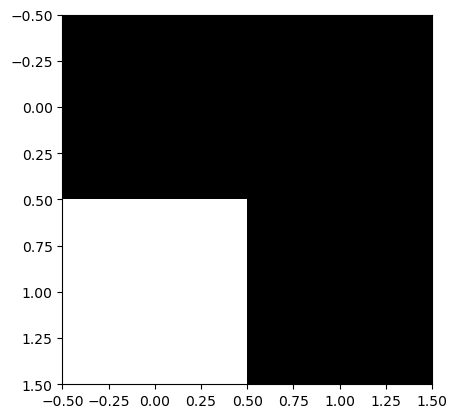

Step 1370


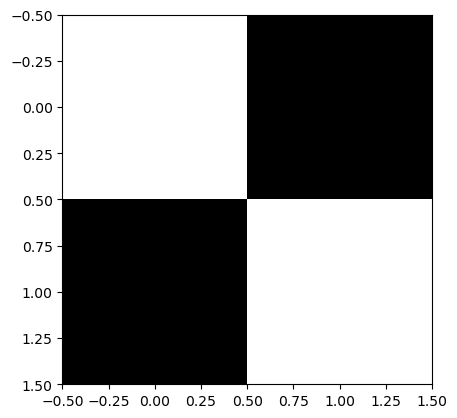

Step 1380


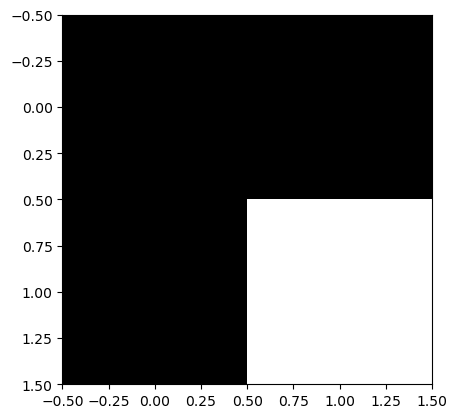

Step 1390


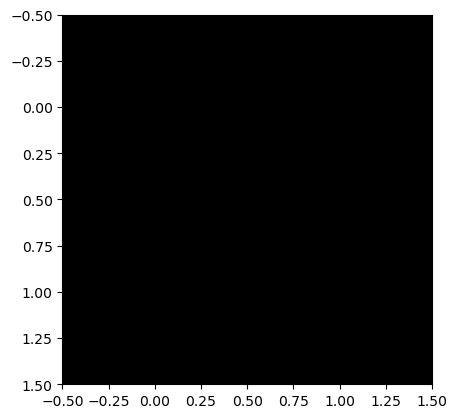

Step 1400


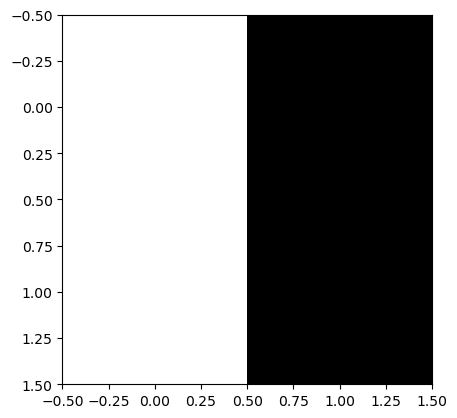

Step 1410


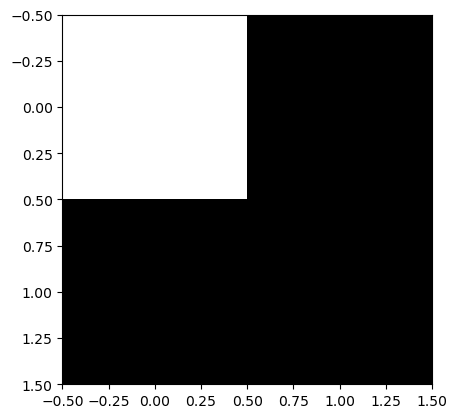

Step 1420


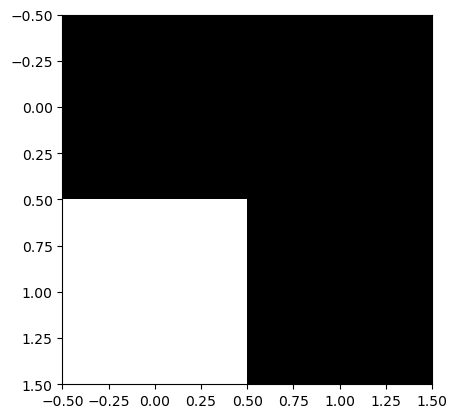

Step 1430


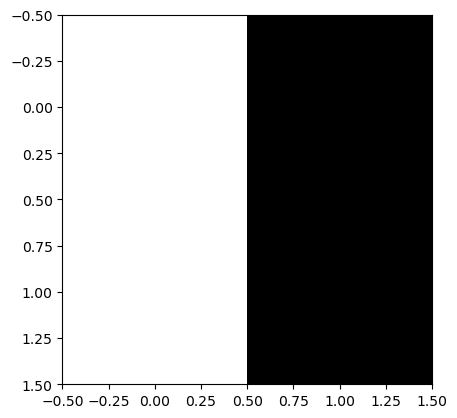

Step 1440


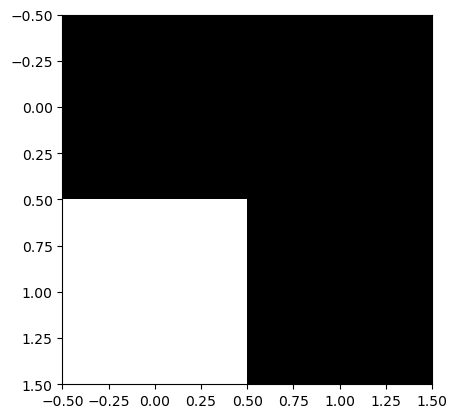

Step 1450


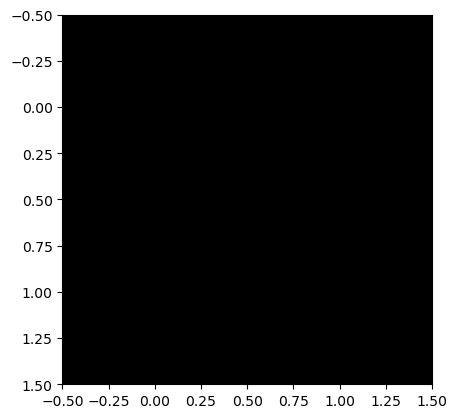

Step 1460


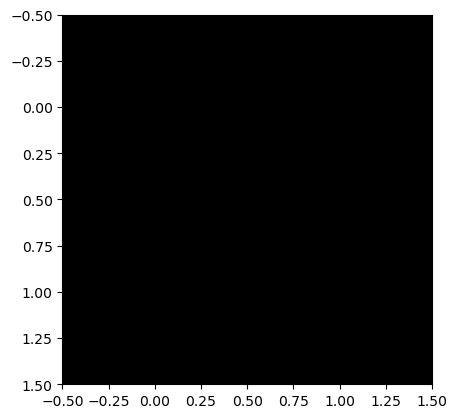

Step 1470


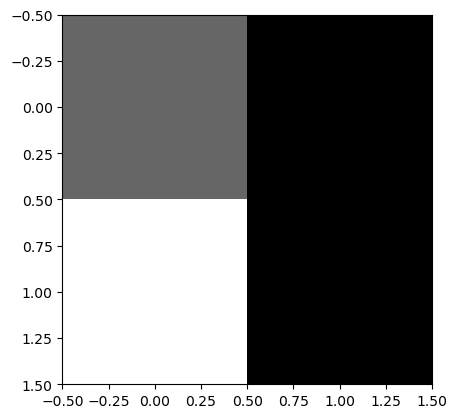

Step 1480


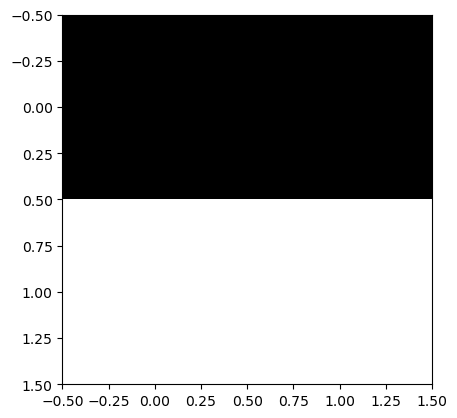

Step 1490


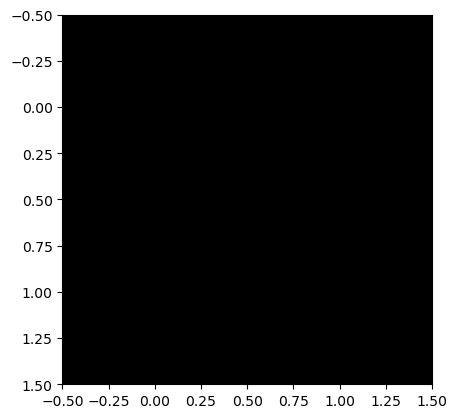

Step 1500


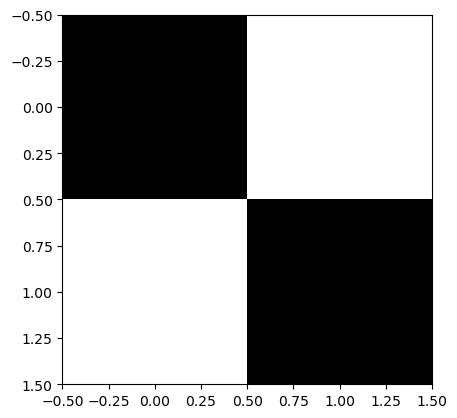

Step 1510


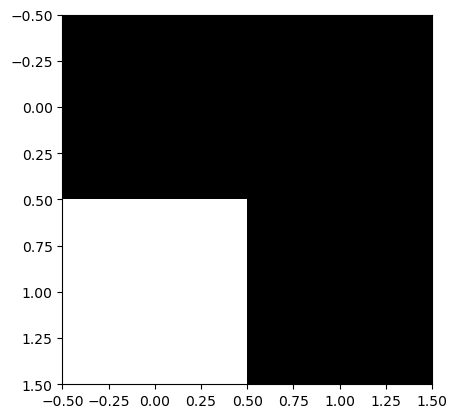

Step 1520


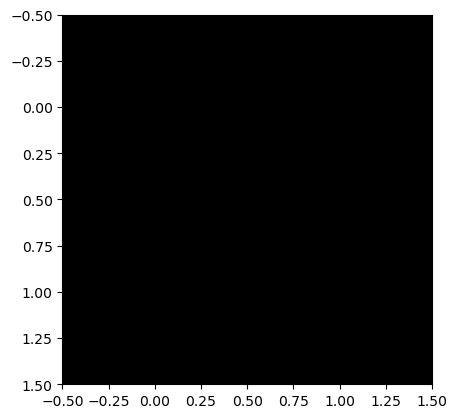

Step 1530


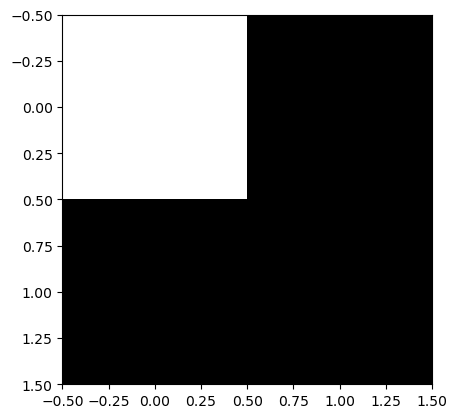

Step 1540


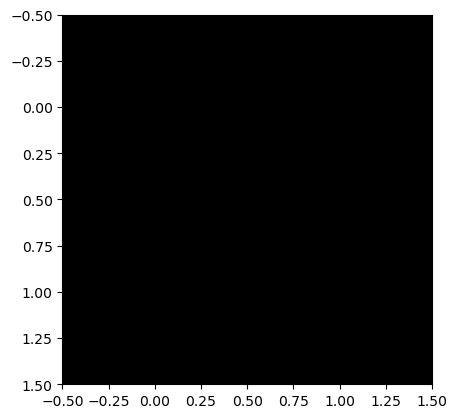

Step 1550


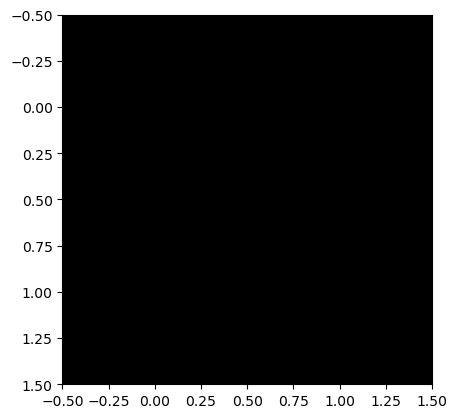

Step 1560


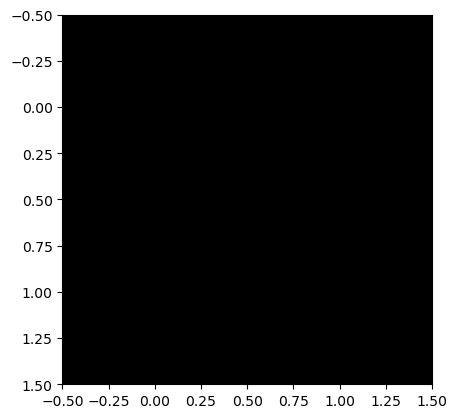

Step 1570


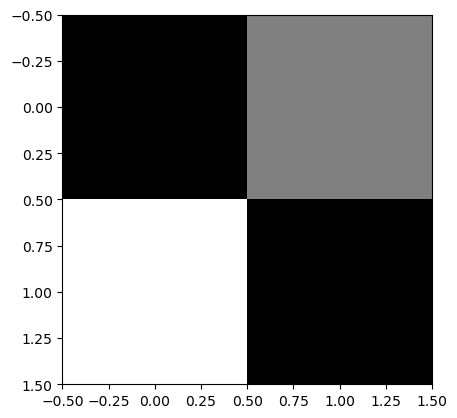

Step 1580


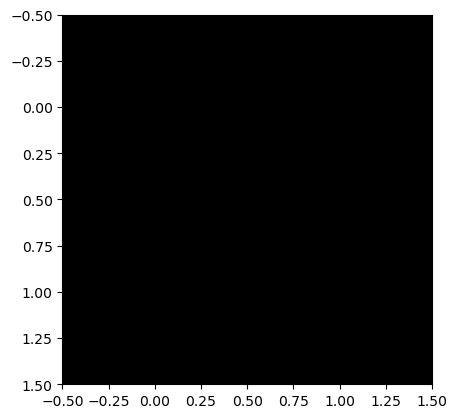

Step 1590


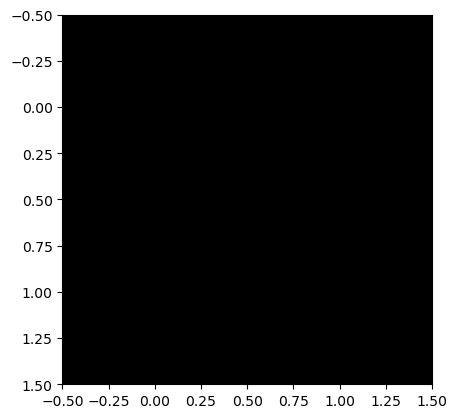

Step 1600


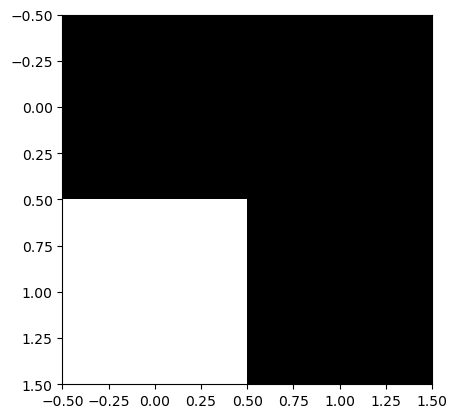

Step 1610


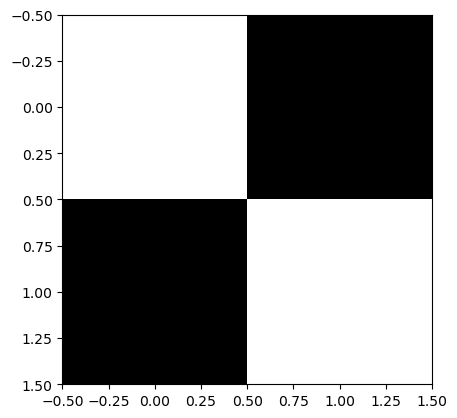

Step 1620


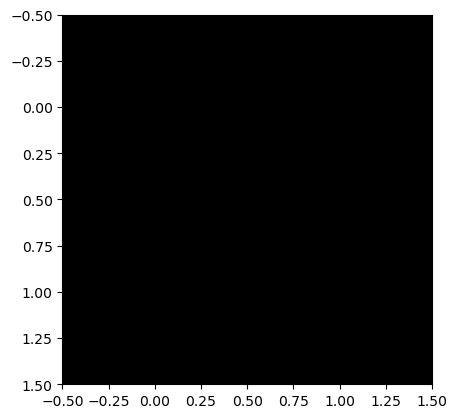

Step 1630


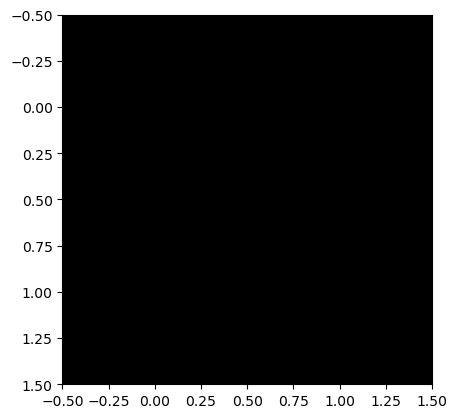

Step 1640


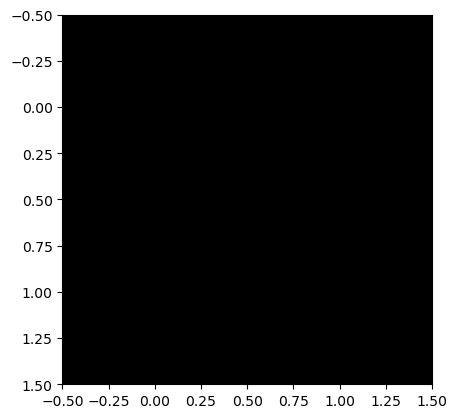

Step 1650


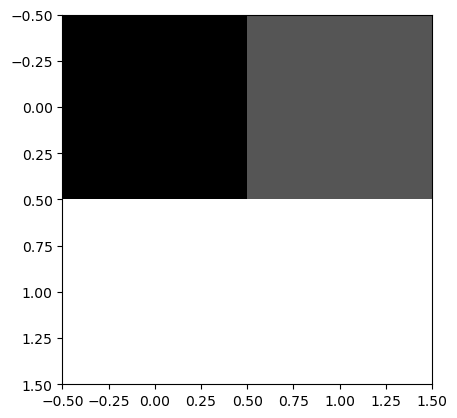

Step 1660


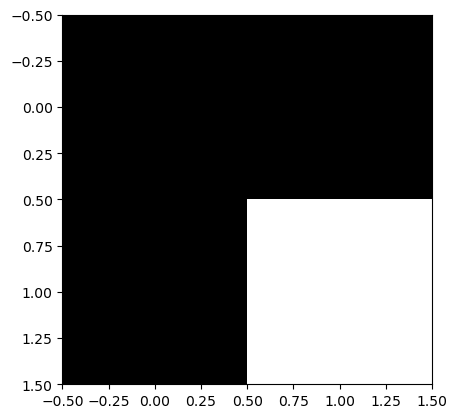

Step 1670


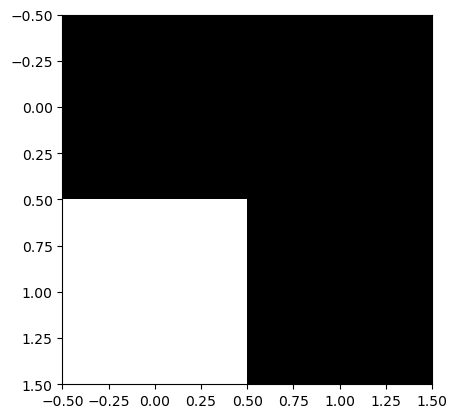

Step 1680


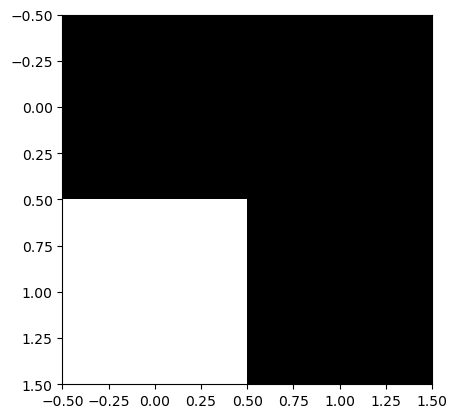

Step 1690


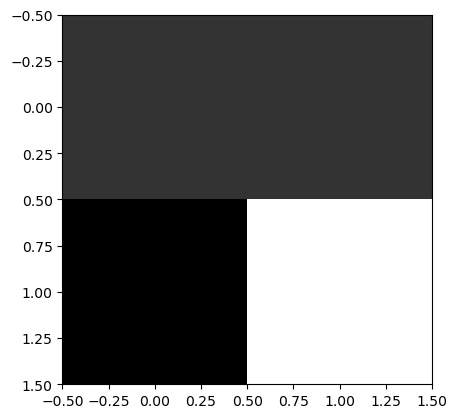

Step 1700


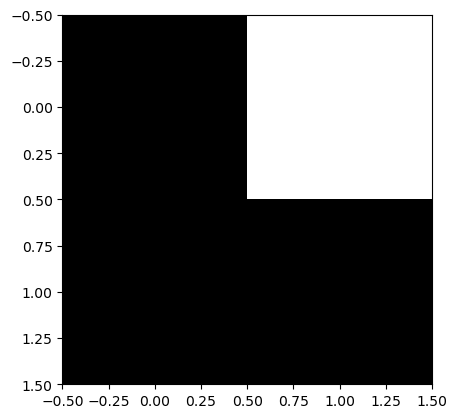

Step 1710


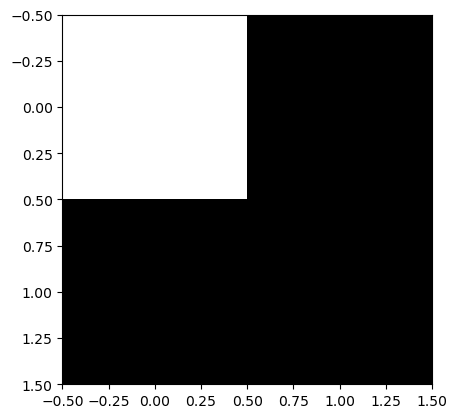

Step 1720


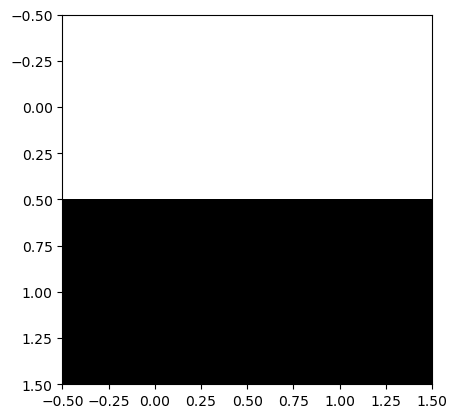

Step 1730


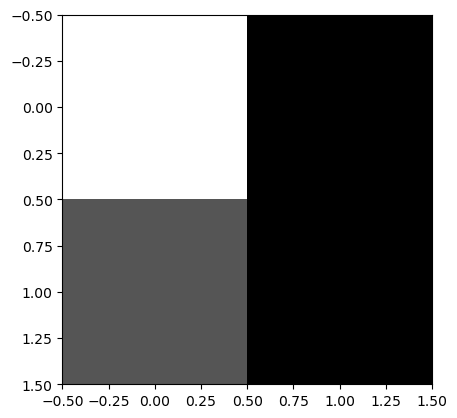

Step 1740


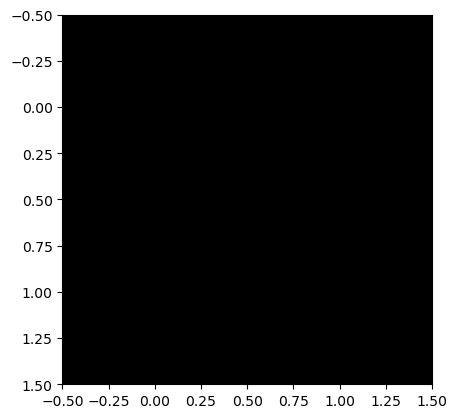

Step 1750


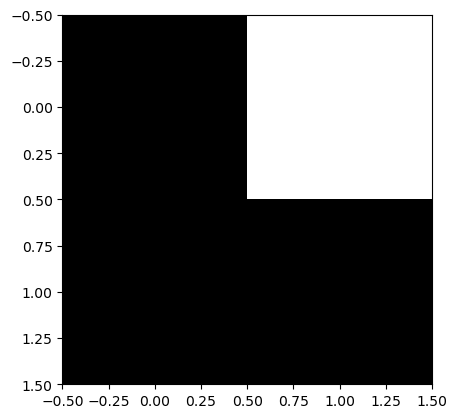

Step 1760


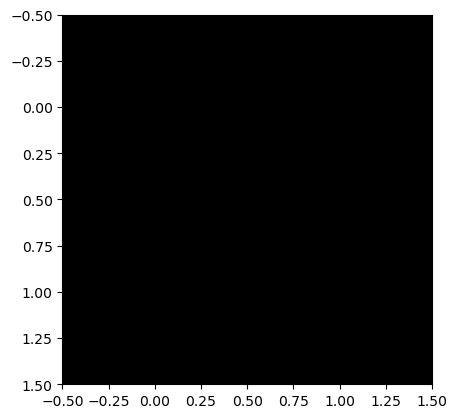

Step 1770


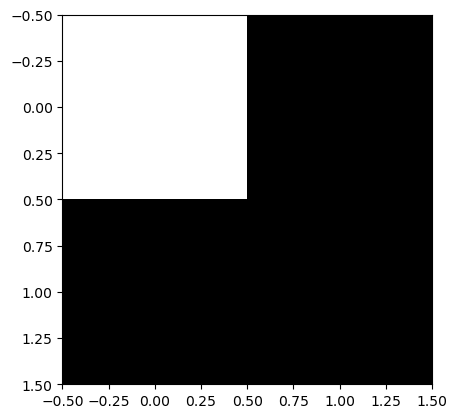

Step 1780


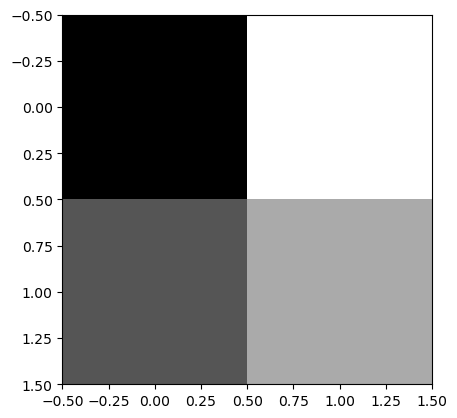

Step 1790


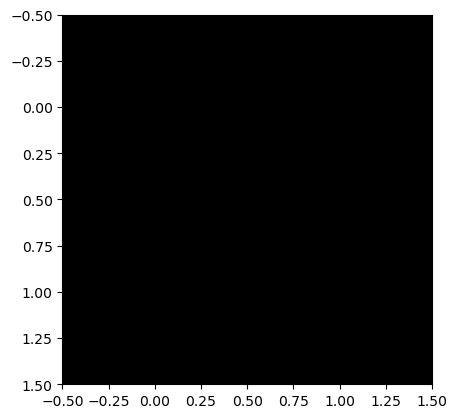

Step 1800


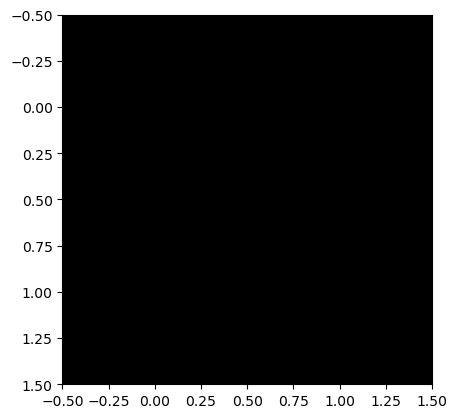

Step 1810


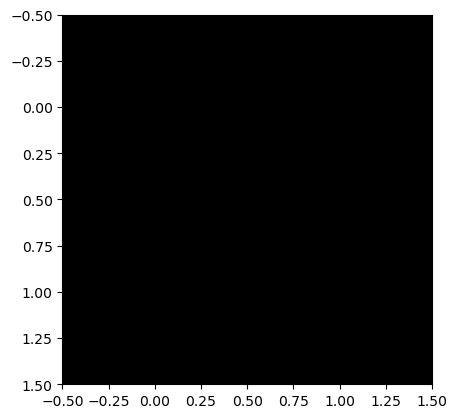

Step 1820


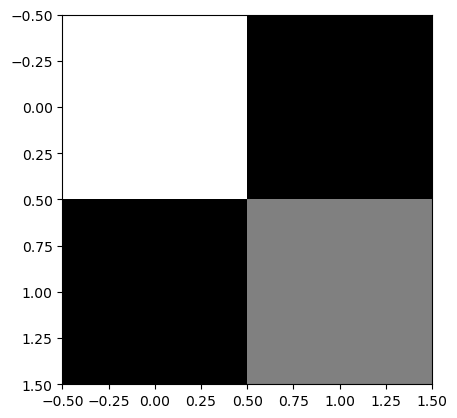

Step 1830


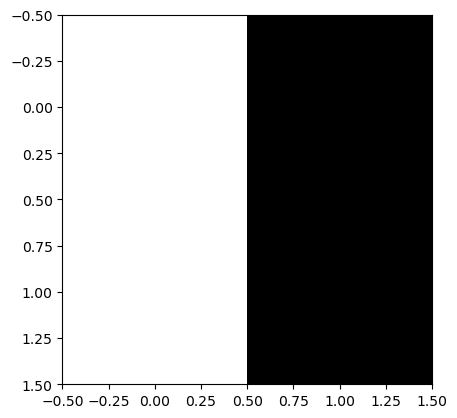

Step 1840


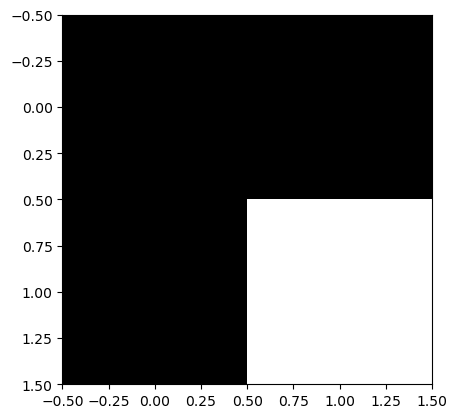

Step 1850


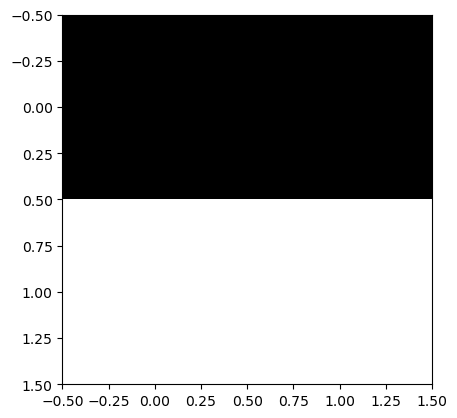

Step 1860


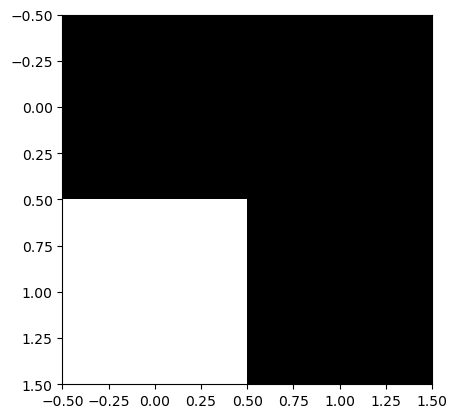

Step 1870


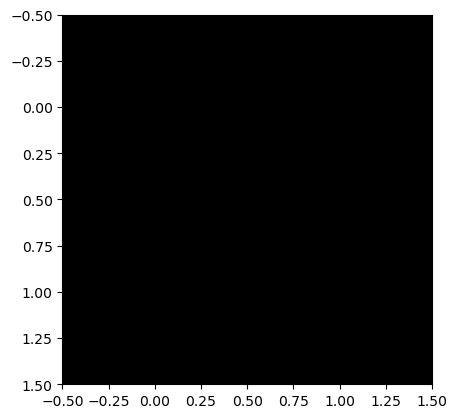

Step 1880


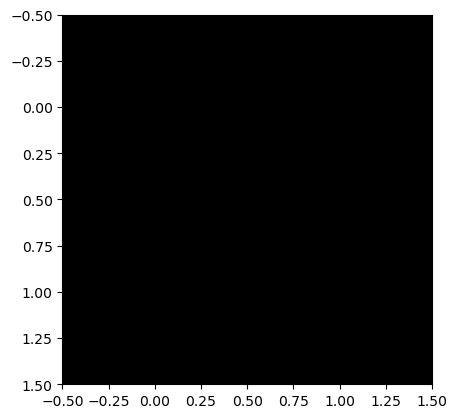

Step 1890


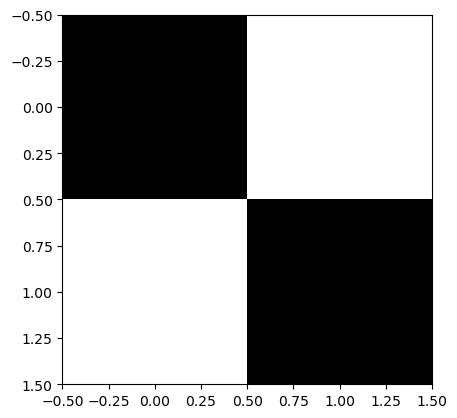

Step 1900


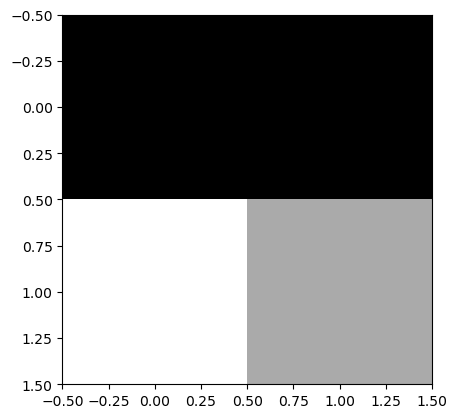

Step 1910


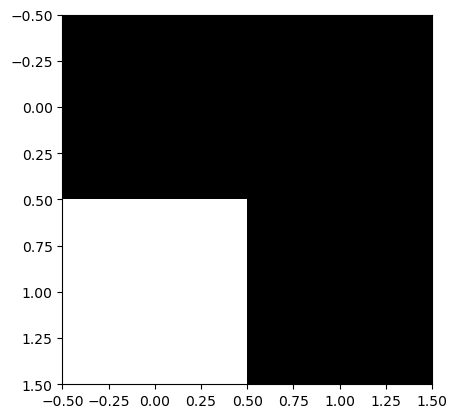

Step 1920


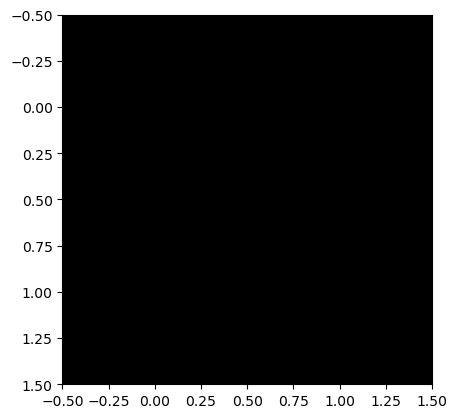

Step 1930


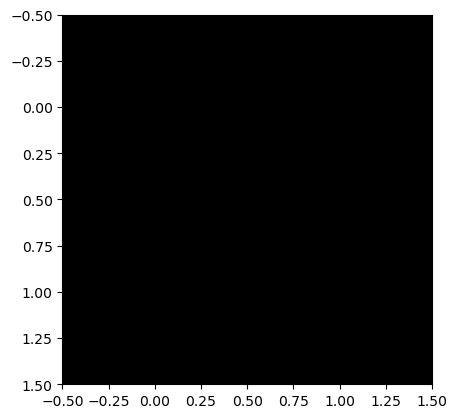

Step 1940


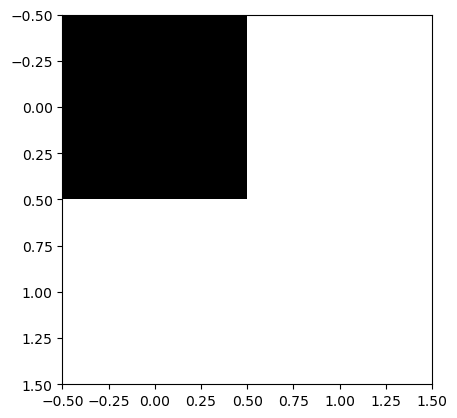

Step 1950


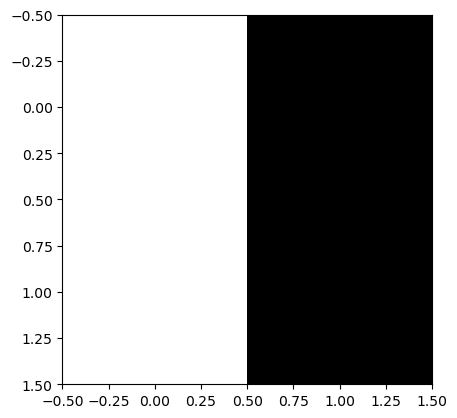

Step 1960


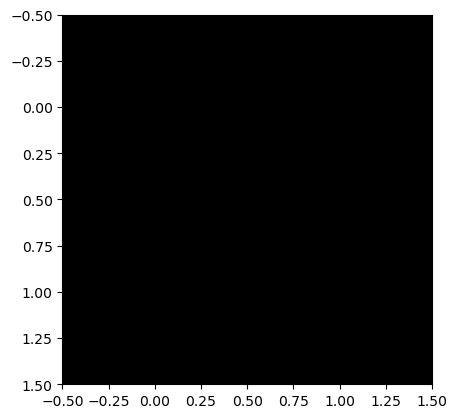

Step 1970


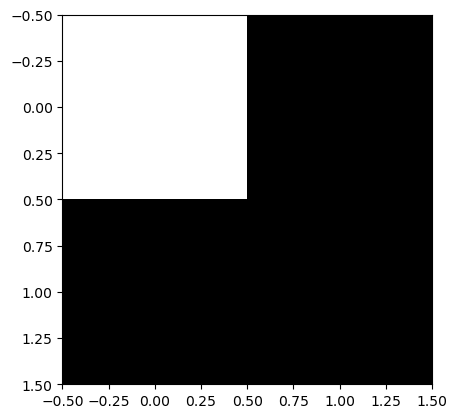

Step 1980


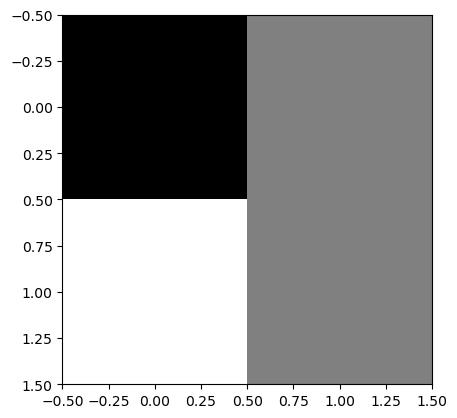

Step 1990


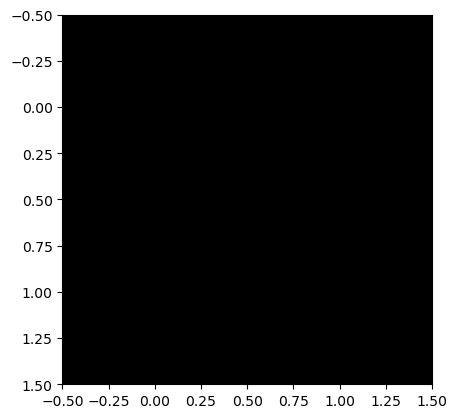

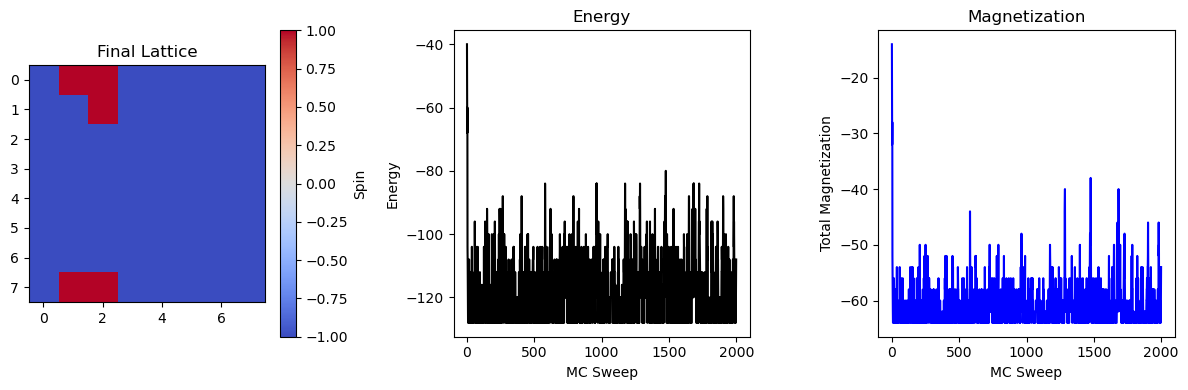

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L):
    """
    Initialize an LxL lattice with random spins ±1.
    """
    return np.random.choice([1, -1], size=(L, L))

def compute_energy(lattice, J=1.0, h=0.0):
    """
    Compute the total energy of the lattice configuration.
    Uses periodic boundary conditions.
    """
    L = lattice.shape[0]
    energy = 0.0
    # Loop over every site and sum contributions
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            # Sum over the four neighbors (with periodic BCs)
            nb = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] 
            # Each bond is counted twice so divide the interaction term by 2 later
            energy += -J * S * nb - h * S
    # Divide by 2 to correct for double counting of neighbor pairs
    return energy 

def metropolis_step(lattice, beta, J=1.0, h=0.0):
    """
    Perform one Metropolis sweep of the lattice.
    Each sweep consists of attempting to update N=LxL randomly selected sites.
    """
    L = lattice.shape[0]
    for _ in range(L * L):
        # Choose a random site
        a = np.random.randint(0, L)
        b = np.random.randint(0, L)
        S = lattice[a, b]
        # Sum of nearest neighbors with periodic boundary conditions
        nb = (lattice[(a+1)%L, b] + lattice[(a-1)%L, b] +
              lattice[a, (b+1)%L] + lattice[a, (b-1)%L])
        # Energy change if we flip the spin at (a, b)
        dE = 2 * S * (J * nb + h)
        # Metropolis acceptance condition
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            lattice[a, b] = -S
    return lattice

def simulate_ising(L, n_steps, beta, J=1.0, h=0.0):
    """
    Run the 2D Ising model simulation.
    Returns the final lattice configuration, the energy history, and the magnetization history.
    """
    mc_samples = []
    lattice = initialize_lattice(L)
    energies = []
    magnetizations = []
    
    for step in range(n_steps):
        lattice = metropolis_step(lattice, beta, J, h)
        if step % 10 == 0:
            print(f"Step {step}")
            plt.imshow(coarse_graining(lattice, 4), cmap='gray', interpolation='nearest')
            plt.show()
        mc_samples.append(lattice.copy())
        energies.append(compute_energy(lattice, J, h))
        magnetizations.append(np.sum(lattice))
    
    return np.array(mc_samples), np.array(energies), np.array(magnetizations)

def coarse_graining(lattice, block_size):
    """
    Coarse-grain a lattice by averaging over blocks of spins.
    """
    L = lattice.shape[0]
    new_L = L // block_size
    new_lattice = np.zeros((new_L, new_L))
    for i in range(new_L):
        for j in range(new_L):
            block = lattice[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            new_lattice[i, j] = np.mean(block)
    return new_lattice

if __name__ == "__main__":
    # Simulation parameters
    L = 8        # Lattice size LxL
    n_steps = 2000  # Number of Monte Carlo sweeps
    T = 2.269*0.8       # Temperature (near the critical temperature for the 2D Ising model)
    beta = 1.0 / T  # Inverse temperature
    
    # Run the simulation
    lattice, energies, magnetizations = simulate_ising(L, n_steps, beta, J=1.0, h=0.0)
    
    # Plotting the final lattice configuration, energy, and magnetization evolution.
    plt.figure(figsize=(12, 4))
    
    # Plot the final lattice configuration
    plt.subplot(1, 3, 1)
    plt.imshow(lattice[-1], cmap='coolwarm', interpolation='nearest')
    plt.title("Final Lattice")
    plt.colorbar(label="Spin")
    
    # Plot the energy as a function of MC steps
    plt.subplot(1, 3, 2)
    plt.plot(energies, color='black')
    plt.title("Energy")
    plt.xlabel("MC Sweep")
    plt.ylabel("Energy")
    
    # Plot the magnetization as a function of MC steps
    plt.subplot(1, 3, 3)
    plt.plot(magnetizations, color='blue')
    plt.title("Magnetization")
    plt.xlabel("MC Sweep")
    plt.ylabel("Total Magnetization")
    
    plt.tight_layout()
    plt.show()


In [ ]:
# Flatten each configuration into a vector (each site becomes one component)
N_sites = L * L
n_samples = n_steps
mc_samples = lattice.copy()
flat_samples = mc_samples.reshape(n_steps, N_sites)

# -------------------------------
# 1. Compute the first cumulant: the mean field φ_i
phi = np.mean(flat_samples, axis=0)  # shape: (N_sites,)

# -------------------------------
# 2. Compute the second cumulant: connected two-point function G^(2)
# Note: np.cov by default computes the covariance as ⟨S_i S_j⟩ - ⟨S_i⟩⟨S_j⟩.
G2 = np.cov(flat_samples, rowvar=False, bias=True)  # shape: (N_sites, N_sites)

# The 1PI two-point vertex (Γ^(2)) is the matrix inverse of G^(2):
Gamma2 = np.linalg.inv(G2)

# -------------------------------
# 3. Compute the third cumulant G^(3)
# First compute the third moment M3_{ijk} = ⟨S_i S_j S_k⟩.
G3_moment = np.zeros((N_sites, N_sites, N_sites))
for sample in flat_samples:
    # Outer product three times; einsum helps build a 3D tensor.
    G3_moment += np.einsum('i,j,k->ijk', sample, sample, sample)
G3_moment /= n_samples

# Now subtract the disconnected parts:
# For a field with nonzero mean, the connected three-point function is:
#   G^(3)_{ijk} = ⟨S_i S_j S_k⟩ 
#                 - φ_i G^(2)_{jk} - φ_j G^(2)_{ik} - φ_k G^(2)_{ij} 
#                 - φ_i φ_j φ_k
G3 = np.zeros_like(G3_moment)
for i in range(N_sites):
    for j in range(N_sites):
        for k in range(N_sites):
            G3[i,j,k] = (G3_moment[i,j,k]
                         - phi[i] * G2[j,k]
                         - phi[j] * G2[i,k]
                         - phi[k] * G2[i,j]
                         - phi[i] * phi[j] * phi[k])
# (For symmetric systems with φ ≈ 0 the subtraction is minimal.)

# -------------------------------
# 4. Compute the 1PI three-point vertex Γ^(3)
# In a tree-level inspired relation, one obtains:
#   Γ^(3) = - (Γ^(2) ⊗ Γ^(2) ⊗ Γ^(2)) ⊗ G^(3)
Gamma3 = - np.einsum('ia,jb,kc,abc->ijk', Gamma2, Gamma2, Gamma2, G3)

# -------------------------------
# 5. Compute the fourth moment M4_{ijkl} = ⟨S_i S_j S_k S_l⟩
M4 = np.zeros((N_sites, N_sites, N_sites, N_sites))
for sample in flat_samples:
    # Outer product four times; use einsum to get a 4D tensor.
    M4 += np.einsum('i,j,k,l->ijkl', sample, sample, sample, sample)
M4 /= n_samples

# It is useful to reconstruct the full two-point moment:
# ⟨S_i S_j⟩ = G2_{ij} + φ_i φ_j.
M2 = G2 + np.outer(phi, phi)

# -------------------------------
# 6. Compute the connected fourth cumulant G^(4)
# For a general field the fourth cumulant is given by:
#   G^(4)_{ijkl} = ⟨S_i S_j S_k S_l⟩ 
#                 - ⟨S_i S_j⟩⟨S_k S_l⟩ - ⟨S_i S_k⟩⟨S_j S_l⟩ - ⟨S_i S_l⟩⟨S_j S_k⟩ 
#                 + 2 φ_i φ_j φ_k φ_l
#
# Here, we use M2 for ⟨S_i S_j⟩.
G4 = M4 - (
    np.einsum('ij,kl->ijkl', M2, M2) +
    np.einsum('ik,jl->ijkl', M2, M2) +
    np.einsum('il,jk->ijkl', M2, M2)
) + 2 * np.einsum('i,j,k,l->ijkl', phi, phi, phi, phi)

# -------------------------------
# 7. Compute the 1PI four-point vertex Γ^(4)
# In an analogous manner to the three-point vertex, one may write (in a tree-level approximation):
#   Γ^(4)_{ijkl} = - G^(4)_{ijkl} + 3 * (Γ^(2) ⊗ Γ^(2) ⊗ Γ^(2) ⊗ Γ^(2)) ⊗ G^(4)_{abcd}
#
# That is, we contract four copies of Γ^(2) with G^(4) over four indices:
Gamma4 = - G4 + 3 * np.einsum('ia,jb,kc,ld,abcd->ijkl', Gamma2, Gamma2, Gamma2, Gamma2, G4)

# -------------------------------
# 8. (Optional) Reconstruct the effective action expansion
# For small fluctuations δφ = φ - φ_ref (with φ_ref a reference field, often the mean field),
# one has an expansion:
#
#   Γ[φ] = const + ½ ∑_{ij} Γ^(2)_{ij} δφ_i δφ_j 
#           + 1/3! ∑_{ijk} Γ^(3)_{ijk} δφ_i δφ_j δφ_k 
#           + 1/4! ∑_{ijkl} Γ^(4)_{ijkl} δφ_i δφ_j δφ_k δφ_l + …
#
# In this example we have computed the vertex functions up to fourth order.

# -------------------------------
# 9. Display some of the computed quantities
print("Mean field φ (first cumulant):")
print(phi.reshape(L, L))
print("\nConnected two-point function G^(2) (covariance matrix):")
print(G2)
print("\n1PI two-point vertex Γ^(2):")
print(Gamma2)
print("\n1PI three-point vertex Γ^(3) (shape {}):".format(Gamma3.shape))
print(Gamma3)
print("\n1PI four-point vertex Γ^(4) (shape {}):".format(Gamma4.shape))
print(Gamma4)


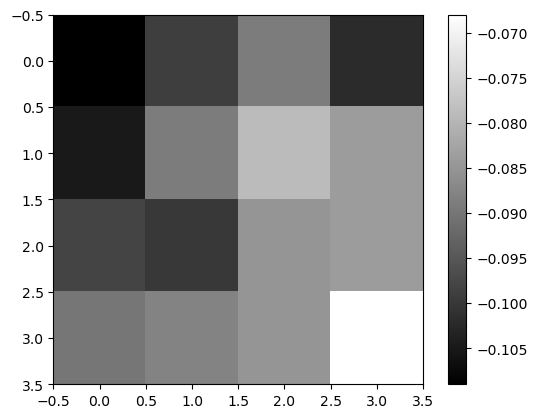

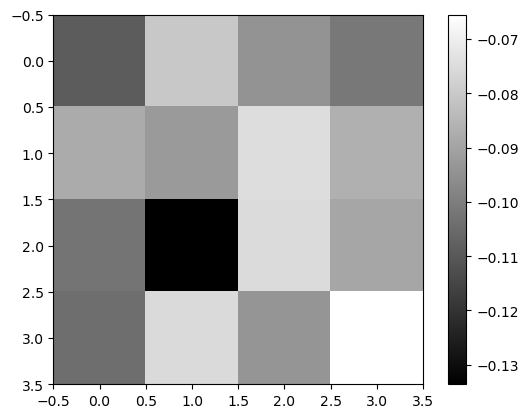

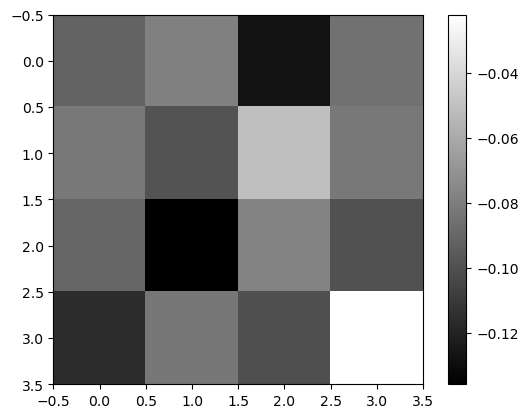

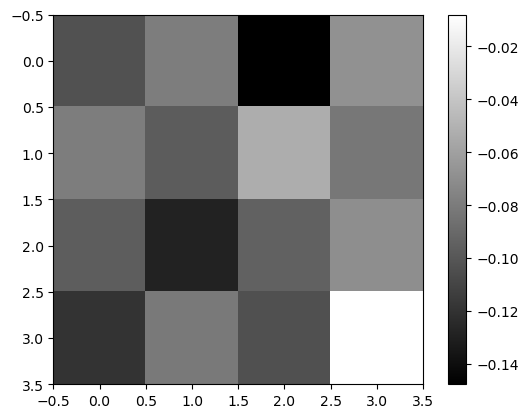

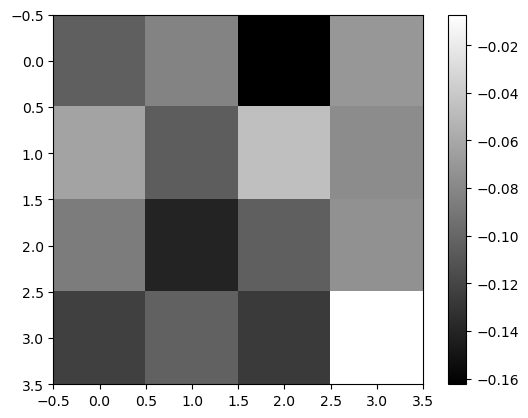

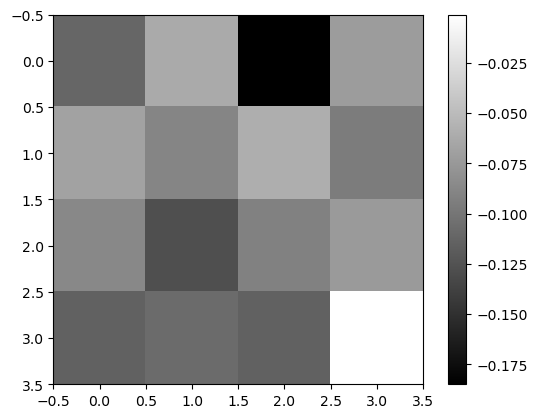

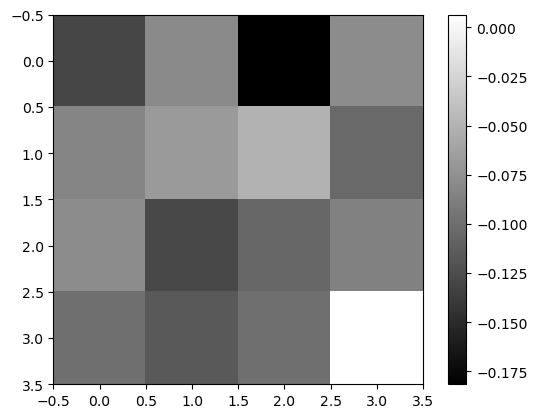

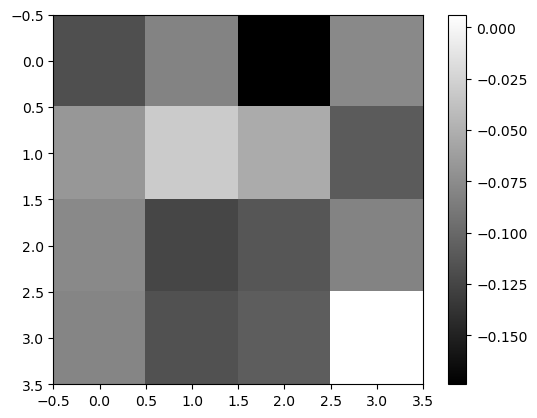

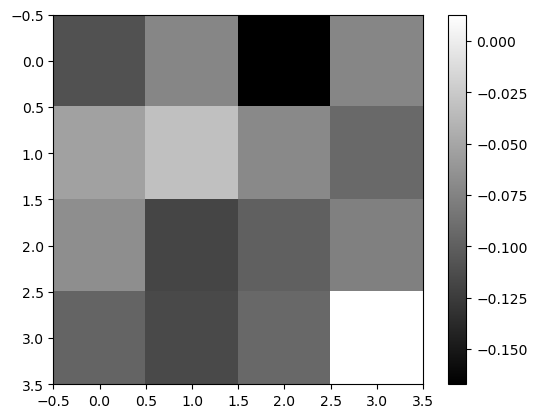

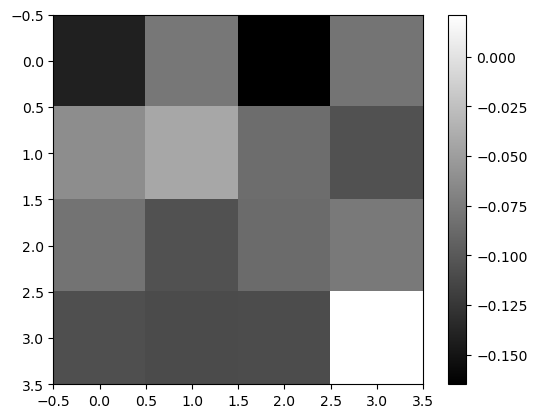

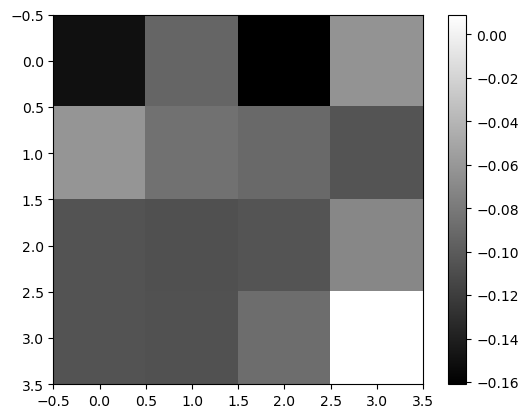

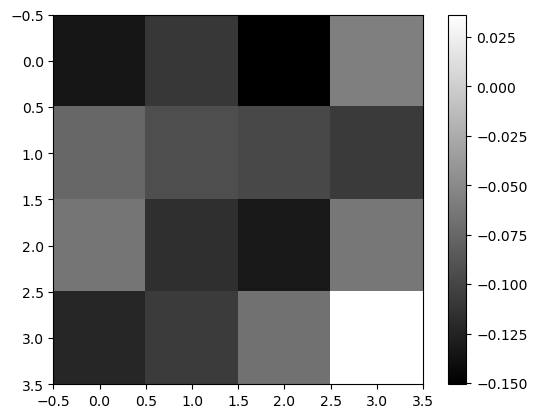

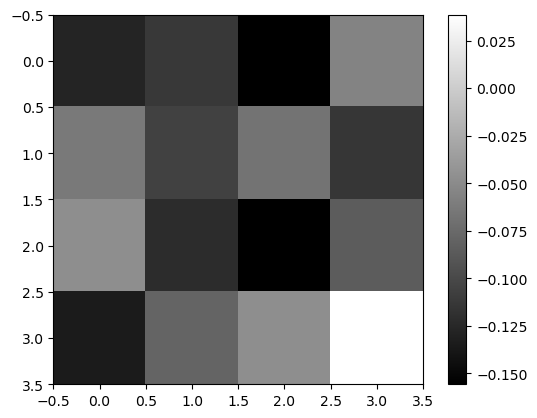

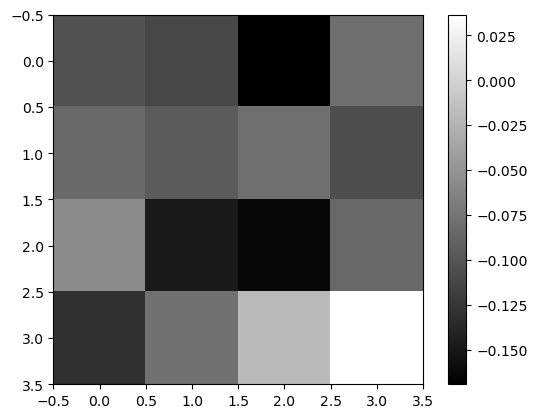

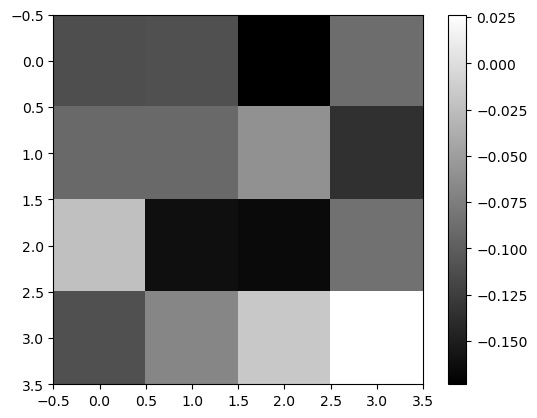

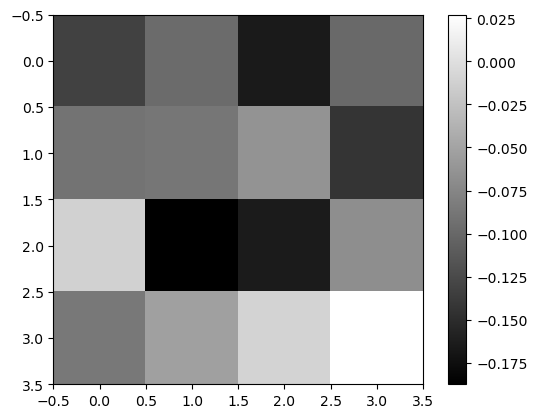

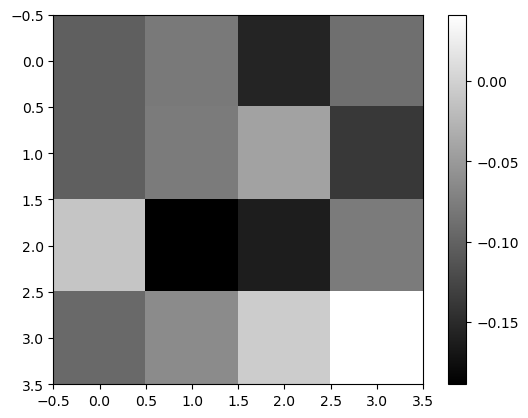

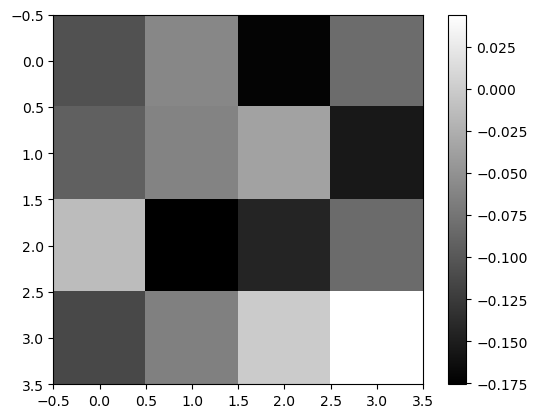

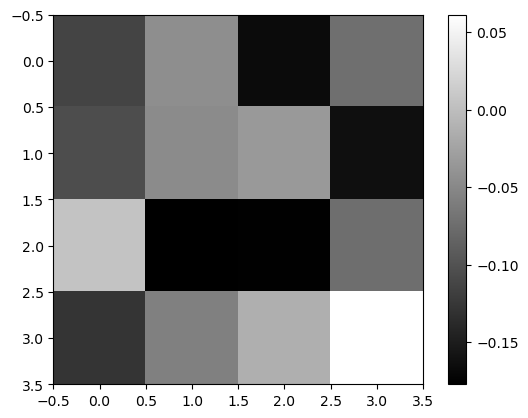

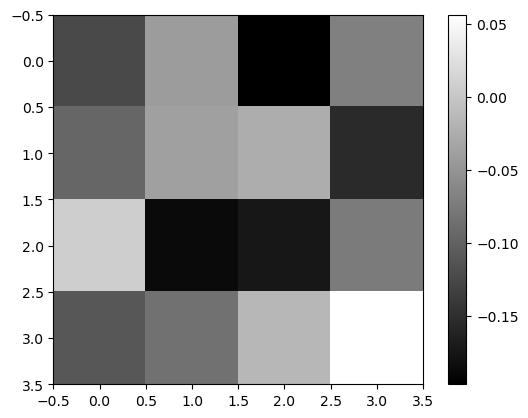

Acceptance rate: 1.0
Number of effective action samples: 20


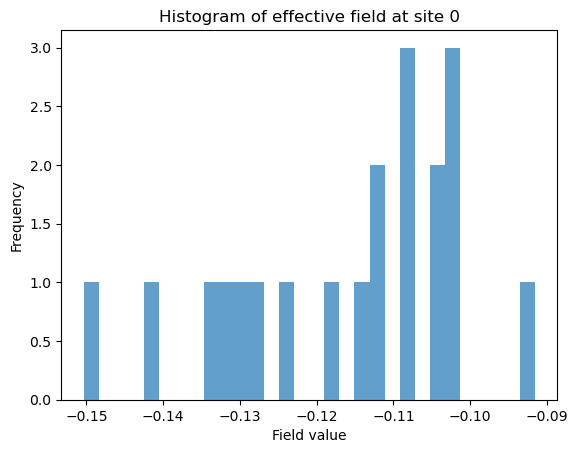

In [9]:
# Define the effective action functional.
def effective_action(phi, phi0, Gamma2, Gamma3, Gamma4):
    # delta field relative to the reference field phi0
    delta = phi - phi0
    # Quadratic term: 1/2 sum_{ij} Gamma2_{ij} delta_i delta_j.
    S2 = 0.5 * np.sum(Gamma2 * np.outer(delta, delta))
    # Cubic term: 1/3! sum_{ijk} Gamma3_{ijk} delta_i delta_j delta_k.
    S3 = (1.0/6.0) * np.einsum('ijk,i,j,k', Gamma3, delta, delta, delta)
    # Quartic term: 1/4! sum_{ijkl} Gamma4_{ijkl} delta_i delta_j delta_k delta_l.
    S4 = (1.0/24.0) * np.einsum('ijkl,i,j,k,l', Gamma4, delta, delta, delta, delta)
    return S2 + S3 + S4

# Metropolis sampling using the effective action.
def metropolis_sampling(phi0, Gamma2, Gamma3, Gamma4, n_steps=10000, delta_update=0.1):
    # Start from the reference field.
    current_phi = phi0.copy()
    current_S = effective_action(current_phi, phi0, Gamma2, Gamma3, Gamma4)
    samples = []
    accept_count = 0

    for step in range(n_steps):
        # Propose an update at a random site.
        new_phi = current_phi.copy()
        site = np.random.randint(0, len(current_phi))
        # Add a small random perturbation.
        new_phi[site] += np.random.uniform(-delta_update, delta_update)
        
        # Compute the new effective action.
        new_S = effective_action(new_phi, phi0, Gamma2, Gamma3, Gamma4)
        dS = new_S - current_S
        
        # Metropolis acceptance criterion.
        if dS < 0 or np.random.rand() < np.exp(-dS):
            current_phi = new_phi
            current_S = new_S
            accept_count += 1
        
        # Save the sample every few steps.
        if step % 100 == 0:
            samples.append(current_phi.copy())
            plt.imshow(current_phi.reshape(L, L), cmap='gray')
            plt.colorbar()
            plt.show()
    
    acceptance_rate = accept_count / n_steps
    return np.array(samples), acceptance_rate

# Run the sampling.
n_steps = 2000
delta_update = 0.01
samples_eff, acc_rate = metropolis_sampling(phi, Gamma2, Gamma3, Gamma4, n_steps, delta_update)

print("Acceptance rate:", acc_rate)
print("Number of effective action samples:", samples_eff.shape[0])

# Plot the distribution of one of the sites as an example.
site_index = 0
plt.hist(samples_eff[:, site_index], bins=30, alpha=0.7)
plt.title("Histogram of effective field at site {}".format(site_index))
plt.xlabel("Field value")
plt.ylabel("Frequency")
plt.show()


Effective action simulation observables:
Average magnetization per site: -1.3339950082071581e-05
Susceptibility: 0.00048772082754434905
Binder cumulant: -0.0923976713846848


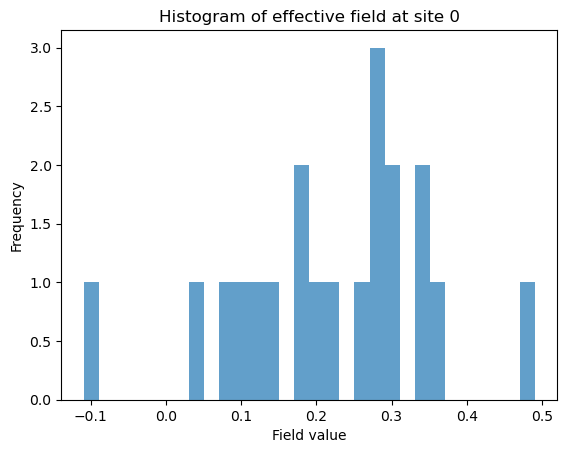

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming samples_eff is an array of effective field configurations
# from the effective action simulation (each sample is a flattened vector)
# and L is the lattice linear size.

def compute_magnetization(samples):
    """Compute average magnetization per site."""
    mag = np.mean(np.sum(samples, axis=1) / samples.shape[1])
    return mag

def compute_susceptibility(samples, beta):
    """Compute susceptibility from the fluctuations of the magnetization."""
    mags = np.sum(samples, axis=1) / samples.shape[1]
    return beta * np.var(mags)

def plot_histogram(samples, site=0):
    """Plot histogram of field values at a given site."""
    plt.hist(samples[:, site], bins=30, alpha=0.7)
    plt.xlabel("Field value")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of effective field at site {site}")
    plt.show()

def binder_cumulant(samples):
    """Compute the Binder cumulant from the magnetization distribution."""
    mags = np.sum(samples, axis=1) / samples.shape[1]
    m2 = np.mean(mags**2)
    m4 = np.mean(mags**4)
    U = 1 - m4 / (3 * m2**2)
    return U

# Example: Evaluate observables from effective action samples.
mag_eff = compute_magnetization(samples_eff)
chi_eff = compute_susceptibility(samples_eff, beta=1.0/2.269)  # adjust beta as needed
binder = binder_cumulant(samples_eff)

print("Effective action simulation observables:")
print("Average magnetization per site:", mag_eff)
print("Susceptibility:", chi_eff)
print("Binder cumulant:", binder)

# Plot histogram for a representative site.
plot_histogram(samples_eff, site=0)
